In [2]:
import  torch 
from    torch import nn, optim, autograd
import  numpy as np
import pandas as pd
from    torch.nn import functional as F
from    matplotlib import pyplot as plt
import  random
import os
import torch.utils.data as Data
from torch import Tensor
from pretreatment import Pretreatment as pre

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import torch
torch.cuda.is_available()

False

In [3]:
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary

In [5]:
#对应的2跳邻接和3跳邻接,3跳邻接其实包含了1跳和2跳
angle_Data = torch.matmul(adj_Data, adj_Data)
angle_Data[angle_Data>0]=1
dihedral_Data = torch.matmul(angle_Data, adj_Data) 

dihedral_Data[dihedral_Data>0]=1
mask3=dihedral_Data.to(torch.bool).reshape(1,304,304)
mask2=angle_Data.to(torch.bool).reshape(1,304,304)
mask1=adj_Data.to(torch.bool).reshape(1,304,304)

In [128]:
C_Data_all=np.loadtxt("坐标.csv",dtype=np.float,delimiter=",")

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [133]:
show_index=[]
for idex in range(0,10000,100):
    
    show_index.append(idex)


In [134]:
C_Data_all[show_index].shape

(100, 912)

In [135]:
np.savetxt("绘制数据.csv",C_Data_all[show_index],delimiter=",")

In [3]:
CD1_Data=np.loadtxt('cd.csv',dtype=np.float,delimiter=',')
UV1_Data=np.loadtxt('uv.csv',dtype=np.float,delimiter=',')

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [11]:
namelist=[1,2,8,9,10,13,16,19,22,23,25,26,30,34,35,38,41,49,52,53,54,56,57,59,61,68,72,74,77,79,87,93,98,100]
len(namelist)

34

In [8]:
np.str(1)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


'1'

In [12]:
for k in namelist:
    if(k==1):
        np.str
        CD_Data_original=np.loadtxt("../data/CD-100/"+np.str(k)+"-CD-original_data.txt")
        UV_Data_original=np.loadtxt("../data/UV-100/"+np.str(k)+"-UV-original_data.txt")
        CD_Data_prediction=np.loadtxt("../data/CD-100/"+np.str(k)+"-CD-prediction_data.txt")
        UV_Data_prediction=np.loadtxt("../data/UV-100/"+np.str(k)+"-UV-prediction_data.txt")
    else:
        tempCDData=np.loadtxt("../data/CD-100/"+np.str(k)+"-CD-original_data.txt")
        tempUVData=np.loadtxt("../data/UV-100/"+np.str(k)+"-UV-original_data.txt")
        tempCD_Data_prediction=np.loadtxt("../data/CD-100/"+np.str(k)+"-CD-prediction_data.txt")
        tempUV_Data_prediction=np.loadtxt("../data/UV-100/"+np.str(k)+"-UV-prediction_data.txt")
        
      
        CD_Data_original=np.append(CD_Data_original,tempCDData,axis=0)
        UV_Data_original=np.append(UV_Data_original,tempUVData,axis=0)
        CD_Data_prediction=np.append(CD_Data_prediction,tempCD_Data_prediction,axis=0)
        UV_Data_prediction=np.append(UV_Data_prediction,tempUV_Data_prediction,axis=0)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing

In [16]:
CD_Data_original1=CD_Data_original.reshape(34,-1,2)
UV_Data_original1=UV_Data_original.reshape(34,-1,2)
CD_Data_prediction1=CD_Data_prediction.reshape(34,-1,2)
UV_Data_prediction1=UV_Data_prediction.reshape(34,-1,2)

In [109]:
CD_Data_original1[2,:,:]

array([[2.39992320e+02, 1.70060823e-01],
       [2.39984641e+02, 1.70098684e-01],
       [2.39976962e+02, 1.70136548e-01],
       ...,
       [1.74837401e+02, 8.66205114e-02],
       [1.74833326e+02, 8.66582880e-02],
       [1.74829250e+02, 8.66960680e-02]])

In [110]:
CD_Data_prediction1[2,:,:]

array([[2.39992320e+02, 3.79883727e-02],
       [2.39984641e+02, 3.80078492e-02],
       [2.39976962e+02, 3.80273827e-02],
       ...,
       [1.74837401e+02, 5.37701916e-03],
       [1.74833326e+02, 5.39915896e-03],
       [1.74829250e+02, 5.42130157e-03]])

In [145]:
showlist=[7,8,11,19,24]
showcd_ori=CD_Data_original1[showlist]
showuv_ori=UV_Data_original1[showlist]
showcd _pre=CD_Data_prediction1[showlist]
showuv_pre=UV_Data_prediction1[showlist]

In [108]:
showcd_ori[0]

array([[239.99232025,   0.41368944],
       [239.98464098,   0.41367716],
       [239.97696221,   0.41366484],
       ...,
       [174.83740122,   0.34475606],
       [174.83332556,   0.34480516],
       [174.8292501 ,   0.34485426]])

In [153]:
showcd_pre[0,:,1]=np.flipud(uv_19[11649:])
showcd_ori[0,:,1]=np.flipud(uv_19[:11649])

In [160]:
CD_Data_prediction1[2,:,1]

array([0.03798837, 0.03800785, 0.03802738, ..., 0.00537702, 0.00539916,
       0.0054213 ])

In [161]:
CD_Data_original1[2,:,1]

array([0.17006082, 0.17009868, 0.17013655, ..., 0.08662051, 0.08665829,
       0.08669607])

In [159]:
showcd_pre[1,:,1]

array([0.0054213 , 0.00539916, 0.00537702, ..., 0.03802738, 0.03800785,
       0.03798837])

In [85]:
showcd_pre[1,:,1]=uv_22[11649:]

In [156]:
np.append(showcd_ori[:,:,1],showcd_pre[:,:,1],0)[1]

array([0.08669607, 0.08665829, 0.08662051, ..., 0.17013655, 0.17009868,
       0.17006082])

In [103]:
np.savetxt("uv_ori_pre.csv",np.append(showuv_ori[:,:,1],showuv_pre[:,:,1],0),delimiter=",")

In [193]:
np.savetxt("cd_22.csv",np.flipud(uv_22[11649:]),delimiter=",")

In [191]:
np.flipud(uv_19[11649:])

array([0.03798837, 0.03800785, 0.03802738, ..., 0.00537702, 0.00539916,
       0.0054213 ])

In [76]:
x1=pd.Series(CD_Data_original1[15,:,1])
y1=pd.Series(CD_Data_prediction1[15,:,1])

x1.corr(y1, 'spearman')

0.23163542000012657

In [211]:
uv_22=np.loadtxt('22绘制.csv',dtype=np.float,delimiter=',')
uv_19=np.loadtxt('cd_19.csv',dtype=np.float,delimiter=',')


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [215]:
cd_ori_pre=np.loadtxt('cd_ori_pre.csv',dtype=np.float,delimiter=',')

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [31]:
CD_Data_original1[4,:,1]

-1.0

In [182]:
update_cd_ori=CD_Data_original1[2,:,1]
update_cd_pre=np.append(CD_Data_original1[2,:1329,1]-0.126,CD_Data_prediction1[2,:10320,1])

In [174]:
CD_Data_original1[2,:1329,1]

array([0.17006082, 0.17009868, 0.17013655, ..., 0.16309977, 0.16307087,
       0.16304196])

In [173]:
CD_Data_prediction1[2,:10320,1]

array([ 0.03798837,  0.03800785,  0.03802738, ..., -0.02414129,
       -0.02414863, -0.02415596])

In [195]:
np.argwhere(uv_22[:11649]==-1)

array([[8644]])

In [196]:
np.argwhere(uv_22[11649:]==-1)

array([[7315]])

In [120]:
np.append(CD_Data_original1[2,:,1].reshape(1,11649),CD_Data_prediction1[2,:,1].reshape(1,11649),0).shape

(2, 11649)

In [144]:
np.append(showuv_ori[:,:,1],showuv_pre[:,:,1],0).reshape[2,5,11649][:]

(10417,)

In [221]:
cd_ori_pre[0]

array([0.41368944, 0.41367716, 0.41366484, ..., 0.34475606, 0.34480516,
       0.34485426])

In [223]:
x1=pd.Series(cd_ori_pre[0])
y1=pd.Series(np.flipud(uv_19))

print(x1.corr(y1, 'spearman'))
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(np.append(x.reshape(1,-1),CD_Data_original1[4,:,1].reshape(1,-1),0), '演示', 0, 1.1649).show()

-0.09527992861495396


AttributeError: 'Series' object has no attribute 'reshape'

In [228]:
uv_22.shape

(2, 11649)

0.8561138423349438


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31034 missing from current font.
  font.set_text(s, 0, flags=flags)


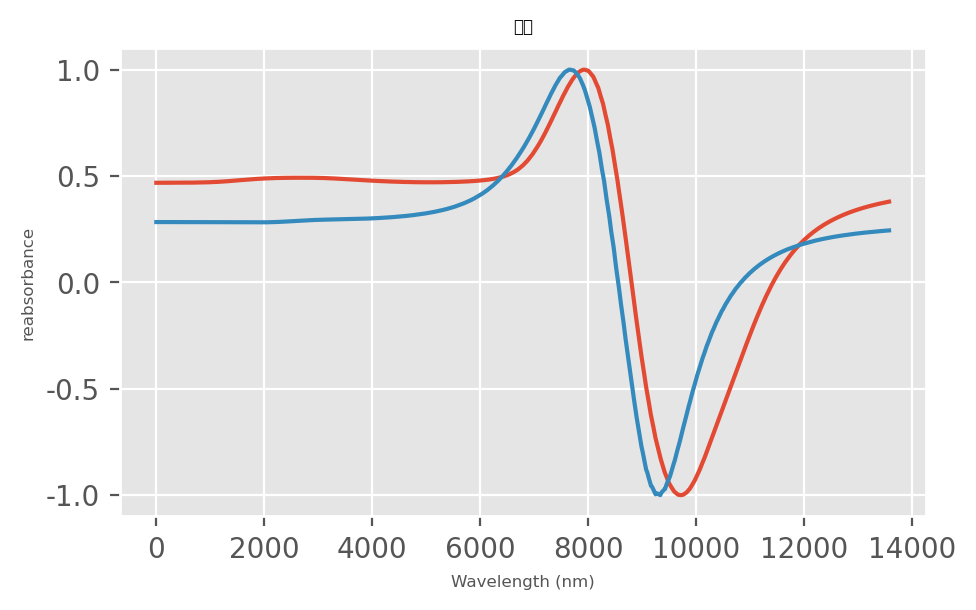

In [232]:
update_cd_ori=cd_ori_pre[4]
update_cd_pre=cd_ori_pre[9]
x1=pd.Series(update_cd_ori)
y1=pd.Series(update_cd_pre)

print(x1.corr(y1, 'spearman'))
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(np.append(update_cd_ori.reshape(1,-1),update_cd_pre.reshape(1,-1),0), '演示', 0, 1.1649).show()

In [203]:
np.savetxt("22绘制.csv",np.append((-CD_Data_prediction1[4,:,1]).reshape(1,-1),CD_Data_original1[4,:,1].reshape(1,-1),0),delimiter=",")

In [207]:
np.append((-CD_Data_prediction1[4,:,1]).reshape(1,-1),CD_Data_original1[4,:,1].reshape(1,-1),0)

array([[ 0.31806459,  0.31803382,  0.31800304, ...,  0.31837392,
         0.31836496,  0.318355  ],
       [-0.23854254, -0.23856294, -0.23858323, ..., -0.19543115,
        -0.19544377, -0.19545668]])

In [1]:
CD_Data_original1[4,:,1]

NameError: name 'CD_Data_original1' is not defined

In [3]:
for k in range(1,101):
    if(k==1):
        C_Data1=np.loadtxt("../data/91-100/S100/pdb/100."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
        CD_Data1=np.loadtxt("../data/91-100/S100/CD_DFT_results/100."+"{:0>3d}".format(k)+"_sig-CD-DFT.txt")
        UV_Data1=np.loadtxt("../data/91-100/S100/UV_DFT_results/100."+"{:0>3d}".format(k)+"_sig-UV-DFT.txt")
    else:
        tempCDData=np.loadtxt("../data/91-100/S100/CD_DFT_results/100."+"{:0>3d}".format(k)+"_sig-CD-DFT.txt")
        tempUVData=np.loadtxt("../data/91-100/S100/UV_DFT_results/100."+"{:0>3d}".format(k)+"_sig-UV-DFT.txt")
        tempCData=np.loadtxt("../data/91-100/S100/pdb/100."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
        
        C_Data1=np.append(C_Data1,tempCData,axis=0)
        CD_Data1=np.append(CD_Data1,tempCDData,axis=0)
        UV_Data1=np.append(UV_Data1,tempUVData,axis=0)

test_CD_Data=np.append(CD1_Data.reshape(9900,1,10417,2),CD_Data1.reshape(100,1,10417,2),axis=0)
test_UV_Data=np.append(UV1_Data.reshape(9900,1,10417,2),UV_Data1.reshape(100,1,10417,2),axis=0)

NameError: name 'CD1_Data' is not defined

In [ ]:
test_cd_group=test_CD_Data[9000:,:,:,1].reshape(250,4,10417)
test_uv_group=test_UV_Data[9000:,:,:,1].reshape(250,4,10417)

In [90]:
test_cd_group=CD_Data1.reshape(100,10417,2)[:,:,1]
test_uv_group=UV_Data1.reshape(100,10417,2)[:,:,1]

In [11]:
x1=pd.Series(test_cd_group[0,0].reshape(1,10417))
y1=pd.Series(test_cd_group[0,2].reshape(1,10417))

x1.corr(y1, 'spearman')

0.13274269479772657

In [89]:
test_cd_group.shape

NameError: name 'test_CD_Data' is not defined

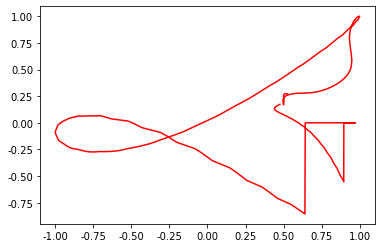

In [72]:
testy=np.fliplr(test_cd_group[0,0].reshape(1,10417)).reshape(10417)
testx=np.fliplr(test_cd_group[0,1].reshape(1,10417)).reshape(10417)
plt.plot(testx,testy,color="red")

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

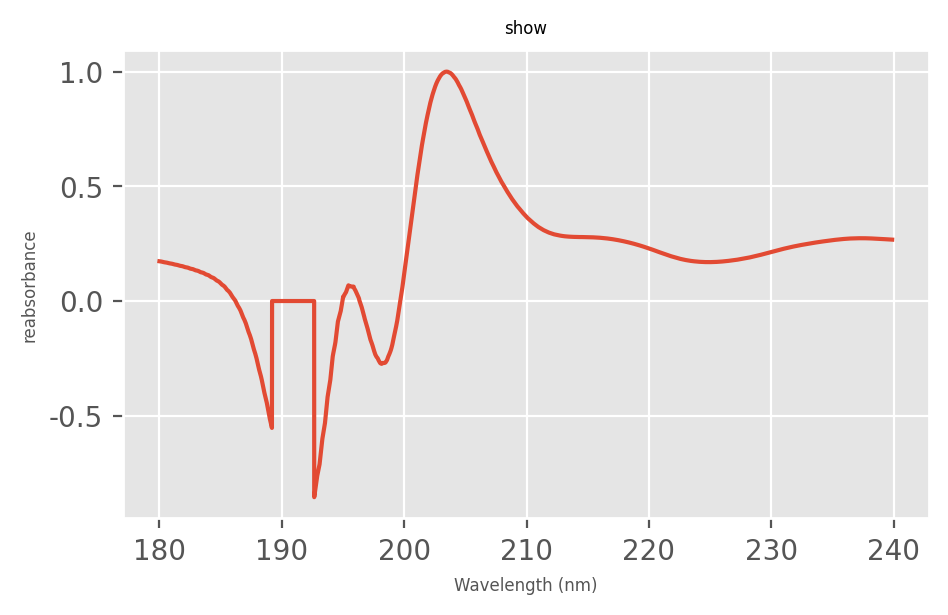

In [65]:
testy=np.fliplr(test_cd_group[0,0].reshape(1,10417))
testx=np.fliplr(test_cd_group[0,0].reshape(1,10417))
test[0,1700:2200]=0
p.PlotSpectrum(test, 'show', 180, 0.00575).show()

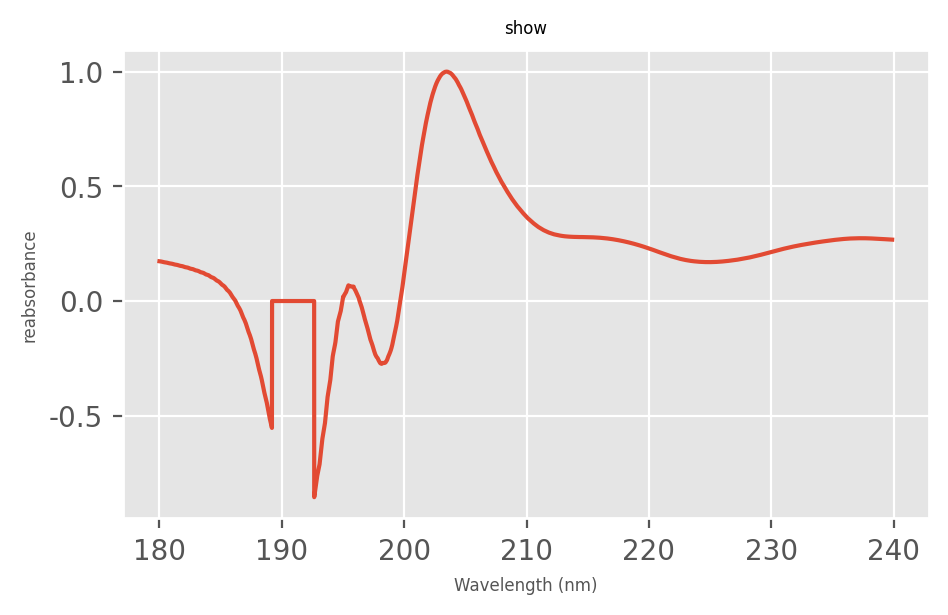

<Figure size 432x288 with 0 Axes>

In [91]:
test=np.fliplr(test_cd_group[0,0].reshape(1,10417))
test[0,1700:2200]=0
p.PlotSpectrum(test, 'show', 180, 0.00575).show()
plt.savefig('直方图.png')

In [22]:



from pretreatment import Pretreatment as pre
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距

p.PlotSpectrum(np.fliplr(test_cd_group[:5,].reshape(5,10417)), 'show', 180, 0.00575).show()


SyntaxError: unexpected EOF while parsing (4089111077.py, line 7)

In [31]:
show_data=np.append(test_cd_group,test_uv_group,axis=1).reshape(100,2,10417)

In [94]:
show_data[10].shape

np.savetxt("freq.csv",CD_Data1.reshape(100,10417,2)[1,:,0],delimiter=",")

In [96]:
test_cd_group.shape



(100, 10417)

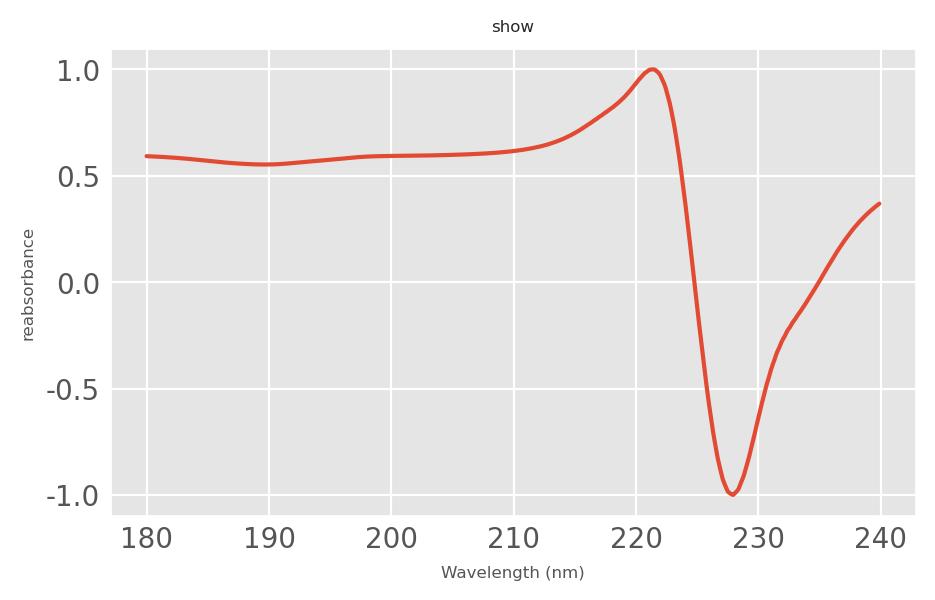

In [98]:
from pretreatment import Pretreatment as pre
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(test_cd_group[:1,:].reshape(1,10417), 'show', 180, 0.00575).show()

In [33]:
C_Data_10_pred=C_Data_10-a

In [38]:
np.savetxt("C_Data_10_pred.csv",C_Data_10_pred.reshape(10,912),delimiter=",")

In [39]:
np.savetxt("C_Data_10.csv",C_Data_10.reshape(10,912),delimiter=",")

In [9]:
#光谱数据读取
filePath = '../data'
def readname(filePath):
    name = os.listdir(filePath)
    return name

names = readname(filePath)
CD_Data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
UV_Data = np.loadtxt('../data/01-10/S01/UV_DFT_results/001.001_sig-UV-DFT.txt')
C_Data = np.loadtxt('../data/01-10/S01/pdb/001.061.pdb',usecols=(5,6,7))

for i in range(1,11):
    tempI=i-1
    for j in range(1,11):
        text ="../data/"+str(tempI)+'1-'+str(i)+"0/S"+str(tempI)+str(j)
        index=str(tempI)+str(j)
        if(j==10):
            text ="../data/"+str(tempI)+'1-'+str(i)+"0/S"+str(i)+"0"
            index=str(i)+"0"
        #tempData=np.loadtxt("../data/"+tempI+'1-'+i+"0/S"+tempI+i+"/001.001_sig-CD-DFT.txt")
        #print(index)
        for k in range(1,101):
            tempCDData=np.loadtxt(text+"/CD_DFT_results/0"+index+"."+"{:0>3d}".format(k)+"_sig-CD-DFT.txt")
            tempUVData=np.loadtxt(text+"/UV_DFT_results/0"+index+"."+"{:0>3d}".format(k)+"_sig-UV-DFT.txt")
            tempCData=np.loadtxt(text+"/pdb/0"+index+"."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
            CD_Data=np.append(CD_Data,tempCDData,axis=0)
            UV_Data=np.append(UV_Data,tempUVData,axis=0)
            C_Data=np.append(C_Data,tempCData,axis=0)

OSError: ../data/91-100/S100/CD_DFT_results/0100.001_sig-CD-DFT.txt not found.

In [87]:
coordinate_Data=np.loadtxt("../data/distance_Ca/001.001.pdb",usecols=(5,6,7))
for i in range(1,101):
    for j in range(1,101):
        text ="../data/distance_Ca/"+"{:0>3d}".format(i)+"."+"{:0>3d}".format(i)+".pdb"
        temp_coordinate=np.loadtxt(text,usecols=(5,6,7))
        
        coordinate_Data=np.append(coordinate_Data,temp_coordinate,axis=0)
    

In [139]:
import os
os.path.exists("../data/UV-100/1-UV-prediction_data.txt")

True

In [158]:
np.loadtxt("../data/CD-100/1-CD-original_data.txt").shape

(11649, 2)

In [160]:
coordinate_Data=np.loadtxt("../data/CD-100/1-CD-prediction_data.txt")
for i in range(1,101):
    
        
    text ="../data/CD-100/"+str(i)+"-CD-prediction_data.txt"
    if(os.path.exists(text)):
        temp_coordinate=np.loadtxt(text)
        coordinate_Data=np.append(coordinate_Data,temp_coordinate,axis=0)

In [162]:
np.savetxt("CDfreq.csv",coordinate_Data.reshape(35,11649,2)[1:,:,0],delimiter=",")

In [157]:
coordinate_Data.shape

(407715, 2)

In [90]:
np.savetxt("羟基C坐标.csv",coordinate_Data[20:],delimiter=",")

In [ ]:
for k in range(1,101):
    if(k==1):
        C_Data1=np.loadtxt("../data/91-100/S100/pdb/100."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
        
    else:
        tempCData=np.loadtxt("../data/91-100/S100/pdb/100."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
        C_Data1=np.append(C_Data1,tempCData,axis=0)
    

In [20]:
C_Data3 = np.loadtxt('../data/91-100/S100/pdb/100.099.pdb',usecols=(5,6,7))
C_Data3.shape

(304, 3)

In [3]:
np.savetxt("坐标.csv",C_Data_all,delimiter=",")

NameError: name 'C_Data_all' is not defined

In [80]:
C_Data1.reshape(100,912)

array([[29.719, 24.343,  7.797, ..., 33.458, 23.106, -0.925],
       [30.323, 25.423,  6.832, ..., 32.027, 21.378, -1.388],
       [30.537, 24.976,  5.589, ..., 31.939, 21.642, -3.407],
       ...,
       [28.418, 24.704,  3.389, ..., 23.902, 17.98 ,  3.92 ],
       [26.766, 24.423,  3.207, ..., 21.166, 16.776,  2.302],
       [31.573, 23.61 ,  3.951, ..., 21.79 , 13.634,  0.077]])

In [86]:
C_Data_all=np.append(C_Data.reshape(9901,912)[1:],C_Data1.reshape(100,912),axis=0)

In [87]:
C_Data_all.shape

(10000, 912)

In [14]:
CD_Data3 = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
CD_Data3.shape

(10417, 2)

In [52]:
torch.nonzero(mask2).shape

torch.Size([1434, 3])

In [409]:
(dist[:620]==dist[620:1240]).shape

torch.Size([620])

In [890]:
#得到输出后的处理
t=raw_data.reshape(304,3)
distances = torch.cdist(t,t,p=2)
distances=distances.reshape(1,304,304)
dist=torch.masked_select(distances,mask)
dist.shape

AttributeError: 'Tensor' object has no attribute 'todevice'

In [371]:
realdist=dist[indich[:,0],:]
realdist.shape

torch.Size([620, 304])

In [372]:
indich[:,0].shape

torch.Size([620])

In [365]:
torch.select(dist>0,dist,realdist)

NameError: name 'realdist' is not defined

In [367]:
torch.nonzero(dist).shape
indich=torch.nonzero(dist)


In [360]:
real_dist.shape

torch.Size([620, 2])

In [339]:
A = np.mat("1 1 0 0;1 1 1 0;0 1 1 1;0 0 1 1")
A**2

matrix([[2, 2, 1, 0],
        [2, 3, 2, 1],
        [1, 2, 3, 2],
        [0, 1, 2, 2]])

In [26]:
np.savetxt("uv.csv",UV_Data[10417:],delimiter=",")

In [27]:
np.savetxt("cd.csv",CD_Data[10417:],delimiter=",")

In [149]:
CD1_Data=np.loadtxt('cd.csv',dtype=np.float,delimiter=',')
UV1_Data=np.loadtxt('uv.csv',dtype=np.float,delimiter=',')

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [163]:
alpha_helix=np.loadtxt("../data/1026/alpha螺旋_汇总.CSV",dtype=np.float,delimiter=",",encoding='utf-8',skiprows=1)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [167]:
print(np.mean(alpha_helix,0))

[3.9881   0.199405 0.       0.0945   0.2186   0.4444   0.4955   0.5093
 0.5102   0.4694   0.4044   0.0101   0.0516   0.2479   0.2608   0.2548
 0.0166   0.       0.       0.       0.       0.      ]


In [5]:
CD1_Data.shape

(103128300, 2)

In [103]:
test_CD_Data=CD1_Data.reshape(9900,1,10417,2)
test_UV_Data=UV1_Data.reshape(9900,1,10417,2)


In [17]:
import math
import numpy as np
 
 
# 这个方法是计算两点的距离公式
def euc_dist(pt1, pt2):
    return math.sqrt((pt2[0]-pt1[0])*(pt2[0]-pt1[0])+(pt2[1]-pt1[1])*(pt2[1]-pt1[1]))
 
# 这个就是计算Frechet Distance距离的具体过程,是用递归方式计算
def _c(ca,i,j,P,Q):
    if ca[i,j] > -1:
        return ca[i,j]
    elif i == 0 and j == 0:
        ca[i,j] = euc_dist(P[0],Q[0])
    elif i > 0 and j == 0:
        ca[i,j] = max(_c(ca,i-1,0,P,Q),euc_dist(P[i],Q[0]))
    elif i == 0 and j > 0:
        ca[i,j] = max(_c(ca,0,j-1,P,Q),euc_dist(P[0],Q[j]))
    elif i > 0 and j > 0:
        ca[i,j] = max(min(_c(ca,i-1,j,P,Q),_c(ca,i-1,j-1,P,Q),_c(ca,i,j-1,P,Q)),euc_dist(P[i],Q[j]))
    else:
        ca[i,j] = float("inf")
    return ca[i,j]
 
# 这个是给我们调用的方法
def frechet_distance(P,Q):
    ca = np.ones((P.shape[0],Q.shape[0]))
    ca = np.multiply(ca,-1)
    return _c(ca, P.shape[0] - 1, Q.shape[0] - 1, P, Q)  # ca是a*b的矩阵(3*4),2,3
 
curve_a = np.array([(1,2),(2,4)])        # 这个是曲线1
curve_b = np.array([(1,4),(2,8),(3,4)])  # 这个是曲线2
 
result = frechet_distance(curve_a,curve_b)
print(result)  # 打印结果


4.0


In [44]:
def calculate_euclid(point_a, point_b):
    """
    Args:
        point_a: a data point of curve_a
        point_b: a data point of curve_b
    Return:
        The Euclid distance between point_a and point_b
    """
    return math.sqrt((point_a - point_b) ** 2)


def calculate_frechet_distance(dp, i, j, curve_a, curve_b):
    """
    Args:
        dp: The distance matrix
        i: The index of curve_a
        j: The index of curve_b
        curve_a: The data sequence of curve_a
        curve_b: The data sequence of curve_b
    Return:
        The frechet distance between curve_a[i] and curve_b[j]
    """
    if dp[i][j] > -1:
        return dp[i][j]
    elif i == 0 and j == 0:
        dp[i][j] = calculate_euclid(curve_a[0], curve_b[0])
    elif i > 0 and j == 0:
        dp[i][j] = max(calculate_frechet_distance(dp, i - 1, 0, curve_a, curve_b),
                       calculate_euclid(curve_a[i], curve_b[0]))
    elif i == 0 and j > 0:
        dp[i][j] = max(calculate_frechet_distance(dp, 0, j - 1, curve_a, curve_b),
                       calculate_euclid(curve_a[0], curve_b[j]))
    elif i > 0 and j > 0:
        dp[i][j] = max(min(calculate_frechet_distance(dp, i - 1, j, curve_a, curve_b),
                           calculate_frechet_distance(dp, i - 1, j - 1, curve_a, curve_b),
                           calculate_frechet_distance(dp, i, j - 1, curve_a, curve_b)),
                       calculate_euclid(curve_a[i], curve_b[j]))
    else:
        dp[i][j] = float("inf")
    return dp[i][j]


def get_similarity(curve_a, curve_b):
    dp = [[-1 for _ in range(len(curve_b))] for _ in range(len(curve_a))]
    similarity = calculate_frechet_distance(dp, len(curve_a) - 1, len(curve_b) - 1, curve_a, curve_b)
    # return max(np.array(dp).reshape(-1, 1))[0]
    return similarity


In [43]:
def dtw(s, t, window):
    n, m = len(s), len(t)0

    w = np.max([window, abs(n-m)])
    0dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
            
    return dtw_matrix


In [106]:
dtw(test_CD_Data[0,0,:,1], test_CD_Data[1,0,:,1], window=1000)[-1,-1]

6161.179752276629

In [33]:
#读取文件名
def file_name(path,loss_file_name):
    train_loss_list = []
    val_loss_list = []
    loss_file_name = []
 
    files = os.listdir(path)  # 采用listdir来读取所有文件
    for i in files:
        loss_file_name.append(i.strip("Epoch"))
 
    loss_file_name.sort(key=lambda x: int(x[:x.find("n")]))  # 按照前面的数字字符排序
    print(loss_file_name)
    return loss_file_name

#按文件名读取数据
def readtestfile(file_name,base_path):
    testData=[]
    for index,name in enumerate(file_name):
        if index == 0:
            testData = np.loadtxt(base_path+name).reshape(1,10417,2)
        else:
            tempData=np.loadtxt(base_path+name).reshape(1,10417,2)
            testData = np.append(testData,tempData,axis=0)
    return testData

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


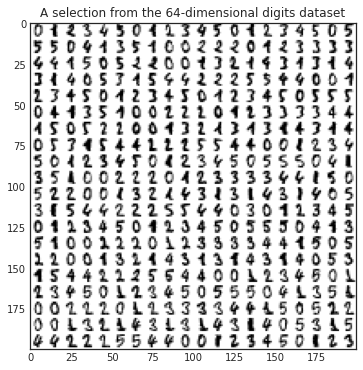

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


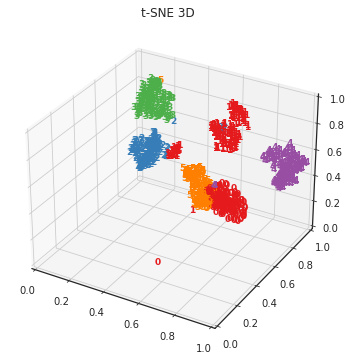

In [174]:
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE
digits = load_digits(n_class=6)
X = digits.data#1083*64
y = digits.target#1083 max(y)=5

n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

#按行放置 取前400个图片
#img中会有0、10、20列这些没有，是为了形成空列吧。
plt.imshow(img, cmap=plt.cm.binary)#cmap: 颜色图谱（colormap), 默认绘制为RGB(A)颜色空间。
plt.title('A selection from the 64-dimensional digits dataset')

tsne = TSNE(n_components=3, init='pca', random_state=0)
t0 = time
X_tsne = tsne.fit_transform(X)
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)

plot_embedding_3d(X_tsne,"t-SNE 3D " )

In [176]:
X_tsne

array([[ 11.446617 , -26.666042 ,  -4.7517014],
       [ -1.0498937,  16.166412 ,   2.3542767],
       [  1.1018646,  13.010519 ,   4.7725396],
       ...,
       [ 25.399525 ,  11.055394 ,   4.011768 ],
       [ 23.843681 ,  10.07073  ,   1.5184383],
       [  6.861337 , -20.742966 ,  -6.2106504]], dtype=float32)

In [172]:
digits.target.shape

(1083,)

In [35]:
cdspectrum_file=[]
uvspectrum_file=[]
cdspectrum_file=file_name("../data/预测数据计算光谱/cd",cdspectrum_file)
uvspectrum_file=file_name("../data/预测数据计算光谱/uv",uvspectrum_file)

['1normal_sig-CD-DFT.txt', '2normal_sig-CD-DFT.txt', '8normal_sig-CD-DFT.txt', '9normal_sig-CD-DFT.txt', '10normal_sig-CD-DFT.txt', '13normal_sig-CD-DFT.txt', '16normal_sig-CD-DFT.txt', '19normal_sig-CD-DFT.txt', '22normal_sig-CD-DFT.txt', '23normal_sig-CD-DFT.txt', '25normal_sig-CD-DFT.txt', '26normal_sig-CD-DFT.txt', '30normal_sig-CD-DFT.txt', '34normal_sig-CD-DFT.txt', '35normal_sig-CD-DFT.txt', '38normal_sig-CD-DFT.txt', '41normal_sig-CD-DFT.txt', '49normal_sig-CD-DFT.txt', '52normal_sig-CD-DFT.txt', '53normal_sig-CD-DFT.txt', '54normal_sig-CD-DFT.txt', '56normal_sig-CD-DFT.txt', '57normal_sig-CD-DFT.txt', '59normal_sig-CD-DFT.txt', '61normal_sig-CD-DFT.txt', '68normal_sig-CD-DFT.txt', '72normal_sig-CD-DFT.txt', '74normal_sig-CD-DFT.txt', '77normal_sig-CD-DFT.txt', '79normal_sig-CD-DFT.txt', '87normal_sig-CD-DFT.txt', '93normal_sig-CD-DFT.txt', '98normal_sig-CD-DFT.txt', '100normal_sig-CD-DFT.txt']
['1normal_sig-UV-DFT.txt', '2normal_sig-UV-DFT.txt', '8normal_sig-UV-DFT.txt', '9nor

In [36]:
test_uv_data=[]
test_cd_data=[]
test_cd_data=readtestfile(cdspectrum_file,"../data/预测数据计算光谱/cd/")
test_uv_data=readtestfile(uvspectrum_file,"../data/预测数据计算光谱/uv/")

In [38]:
test_cd_data.shape

(34, 10417, 2)

In [39]:
uv_groudtruth=np.loadtxt("../data/uv.csv",dtype=np.float,delimiter=',')
cd_groudtruth=np.loadtxt("../data/cd.csv",dtype=np.float,delimiter=',')

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [41]:
indexoftest=[0,1,7,8,9,12,15,18,21,22,24,25,29,33,34,37,40,48,51,52,53,55,56,58,60,67,71,73,76,78,86,92,97,99]

In [71]:
from pretreatment import Pretreatment as pre
p=pre()
#对光谱进行预处理
def preprocess(X):
    sg = p.SG(X, 4*5+1,2*3,2).reshape(9900,1,10417)
    D1 = p.D1(X).reshape(9900,10416)
    D1_add=np.column_stack((D1,np.zeros((9900,1)))).reshape(9900,1,10417)
    D2 = p.D2(X).reshape(9900,10415)
    D2_add=np.column_stack((D2,np.zeros((9900,2)))).reshape(9900,1,10417)
    X=X.reshape(9900,1,10417)
    a=np.append(sg,X,axis=1)
    b=np.append(a,D1_add,axis=1)
    c=np.append(b,D2_add,axis=1)
    return c

In [127]:
np.zeros((4,1))

array([[0.],
       [0.],
       [0.],
       [0.]])

In [72]:
D1 = p.D1(X).reshape(9901,10416)

In [145]:
np.column_stack((D1,np.zeros((9901,2)))).shape

(9901, 10418)

In [3]:
X=CD1_Data.reshape(9901,10417)
new_cd=preprocess(X[1:])

NameError: name 'CD1_Data' is not defined

In [81]:
new_uv.shape

(9900, 4, 10417)

In [80]:
X=UV1_Data.reshape(9901,10417)
new_uv=preprocess(X[1:])


In [7]:
c

(9901, 2, 10417)

In [7]:
spectrum_data=torch.from_numpy(np.append(CD_Data,UV_Data,axis=1)).to(torch.float32)

NameError: name 'CD_Data' is not defined

In [30]:
spectrum_data.shape
#先切片再转化为图

torch.Size([9901, 2, 10417])

In [9]:
#距离
CD_data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
#UV_data = np.loadtxt('../data/91-100/S100/UV_DFT_results/001.001_sig-UV-DFT.txt')
C_data = np.loadtxt('../data/01-10/S01/pdb/001.001.pdb',usecols=(5,6,7))
#print(CD_data.shape)
#print(UV_data.shape)
print(C_data.shape)
raw_data=torch.from_numpy(C_data.reshape(912,))


(304, 3)


In [94]:



#测试，y的前912位是坐标，后906是内坐标
x=torch.from_numpy(np.append(CD_Data,UV_Data,axis=1))
y=torch.from_numpy(np.append(C_Data,ynei,axis=1))#直接输出坐标

torch_dataset = Data.TensorDataset(x, y)
#torch_dataset = Data.TensorDataset(x, x_dist)#输出距离

train_size = int(len(torch_dataset) * 0.6)
validate_size = int(len(torch_dataset) * 0.3)
test_size = len(torch_dataset) - validate_size - train_size

train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(torch_dataset, [train_size, validate_size, test_size],generator=torch.Generator().manual_seed(0))


train_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)


NameError: name 'CD_Data' is not defined

In [31]:
#只输入cd光谱
x=torch.from_numpy(UV_Data)
y=torch.from_numpy(C_Data)#直接输出坐标

torch_dataset = Data.TensorDataset(x, y)
#torch_dataset = Data.TensorDataset(x, x_dist)#输出距离

train_size = int(len(torch_dataset) * 0.8)
validate_size = int(len(torch_dataset) * 0.1)
test_size = len(torch_dataset) - validate_size - train_size

train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(torch_dataset, [train_size, validate_size, test_size])


train_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)



In [20]:
#内坐标数据读取
nei_data = np.loadtxt('../data/trpcage_gzmat.csv',skiprows=1,delimiter=',',dtype=np.str)
ynei = nei_data.astype(np.float)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
a=ynei[:9900,:302]
b=ynei[:9900,603:]*10

In [186]:
a[:9901].max()

142.06

In [175]:
b[:9001,].max()

16.924

In [159]:
b[:,1].min()

1.2601

In [226]:
np.median(np.abs((a[1]-a[2000])))

3.414999999999999

In [4]:
#无氢原子基团间二面角数据读取
noh_data = np.loadtxt('../data/between_noh.csv',skiprows=2,delimiter=',',dtype=np.str,encoding='gbk',)
noh_y = noh_data.astype(np.float)
noh_y.shape

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(10000, 77)

In [71]:
between_noh=noh_y[:,[1,4]]

In [72]:
between_noh.shape

(10000, 2)

In [4]:
#含氢原子基团所有二面角数据读取
noh_data = np.loadtxt('../data/classlabel_h.csv',skiprows=2,delimiter=',',dtype=np.str,encoding='gbk',)
noh_y = noh_data.astype(np.float)
print(noh_y.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 301)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#含氢原子基团所有二面角数据读取
dist_data = np.loadtxt('../data/change_pre/C_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
distance =dist_data.astype(np.float)
print(distance.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 171)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


array([['3.393598385195278233e+00', '6.811609207815727096e+00',
        '1.021866331767516378e+01', ..., '3.000388141557687405e+00',
        '5.809751285554312972e+00', '3.076424060496213198e+00'],
       ['3.692137592235694932e+00', '7.029560797091095381e+00',
        '1.061199637203104373e+01', ..., '3.018418294405203373e+00',
        '5.951093344924110795e+00', '3.062521346864377492e+00'],
       ['3.198312836481134624e+00', '6.286867662039658633e+00',
        '9.923528152829517168e+00', ..., '3.052635746367390546e+00',
        '6.018722954248683088e+00', '3.101298598974308263e+00'],
       ...,
       ['3.684525206861800406e+00', '6.091664304605101776e+00',
        '7.218622721821664534e+00', ..., '3.226567680988575049e+00',
        '6.325397299774930815e+00', '3.138124917845049655e+00'],
       ['3.308269184936433405e+00', '5.750943661695875342e+00',
        '7.284282600229071925e+00', ..., '3.038234191105090076e+00',
        '6.238702188756888312e+00', '3.235850738213985167e+00']

In [3]:
#最近邻C原子、N原子和CA（无氢C原子）园门子
cadist= np.loadtxt('../data/0611/Nearest_CA_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
cadist_data =cadist.astype(np.float)
print(cadist_data.shape)
cdist= np.loadtxt('../data/0611/nearest_C_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
cdist_data =cdist.astype(np.float)
print(cdist_data.shape)
ndist= np.loadtxt('../data/0611/nearest_N_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
ndist_data =ndist.astype(np.float)
print(ndist_data.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/hom

(10000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 19)
(10000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [5]:
nearest_data=np.append(np.append(cadist_data,cdist_data,axis=1),ndist_data,axis=1)

In [9]:
nearest_data.mean()

3.506528279532999

In [1]:
#次近邻C原子、N原子和CA（无氢C原子）原子
ncadist= np.loadtxt('../data/0611/next-nearest-neighbor_CA_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
ncadist_data =ncadist.astype(np.float)
print(ncadist_data.shape)
ncdist= np.loadtxt('../data/0611/next-nearest-neighbor_C_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
ncdist_data =ncdist.astype(np.float)
print(ncadist_data.shape)
nndist= np.loadtxt('../data/0611/next-nearest-neighbor_N_distance.csv',delimiter=',',dtype=np.str,encoding='gbk',)
nndist_data =nndist.astype(np.float)
print(ncadist_data.shape)

NameError: name 'np' is not defined

In [7]:
next_nearest_data=np.append(np.append(ncadist_data,ncdist_data,axis=1),nndist_data,axis=1)

In [8]:
dist_data=np.append(nearest_data,next_nearest_data,axis=1)

In [10]:
dist_data.mean()

4.724328791300978

In [11]:
dist_data.std()

1.4116530574369608

In [84]:
test_CD_Data.shape

(9900, 1, 10417, 2)

In [14]:
#0522新文件 重点在键角66和100以上的键角
noh_data = np.loadtxt('../data/true_ic_noh.csv',skiprows=0,delimiter=',',dtype=np.str,encoding='gbk',)
noh_y = noh_data.astype(np.float)
print(noh_y.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 456)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#0622新文件 划分了键长和距离的关系，前116位是验证距离关系的数据
noh_data = np.loadtxt('../data/关联数据标注ic.csv',skiprows=1,delimiter=',',dtype=np.str,encoding='gbk',)
noh_y = noh_data.astype(np.float)
print(noh_y.shape)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 513)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#0627新文件 划分了键长和距离的关系，前116位是验证距离关系的数据
dihedral_data = np.loadtxt('../GAN/0627/肽键内部二面角.csv',skiprows=1,delimiter=',',dtype=np.str,encoding='gbk',)
dihedral_y = dihedral_data.astype(np.float)
print(dihedral_y.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
#0720文件
dihedral_CAN= np.loadtxt('../data/0720/CA-Nbond.csv',delimiter=',',dtype=np.str,encoding='gbk',skiprows=1)
dihedral_CAN =dihedral_CAN.astype(np.float)
print(dihedral_CAN.shape)
dihedral_CCA= np.loadtxt('../data/0720/C-CAbond.csv',delimiter=',',dtype=np.str,encoding='gbk',skiprows=1)
dihedral_CCA =dihedral_CCA.astype(np.float)
print(dihedral_CCA.shape)
dihedral_NC= np.loadtxt('../data/0720/N-Cbond.csv',delimiter=',',dtype=np.str,encoding='gbk',skiprows=1)
dihedral_NC =dihedral_NC.astype(np.float)
print(dihedral_NC.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/hom

(10000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(10000, 19)
(10000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [39]:
#0730文件
all_pd= np.loadtxt('../data/0730/all_pd0801.csv',delimiter=',',dtype=np.str,encoding='UTF-8-sig')
all_pd =all_pd.astype(np.float)
print(all_pd.shape)

(10000,)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
show_index=[]
for idex in range(0,10000,100):
    show_index.append(idex)
all_pd=all_pd.reshape(10000,1)

In [48]:
show_pd=all_pd[show_index,-1]

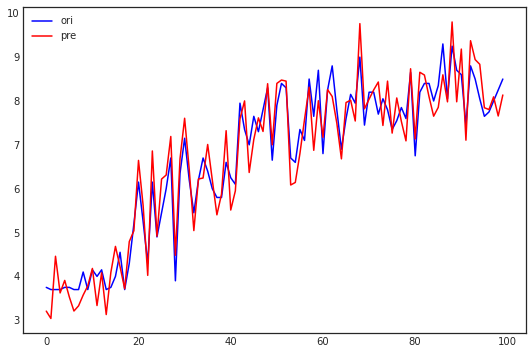

In [117]:
show_pd1=show_pd+(np.random.rand(100)-0.5)*1.6
x1=[i for i in range(100)]
plt.plot(x1,all_pd[show_index,-1],'b')
plt.plot(x1,show_pd1,'r')
plt.legend(["ori","pre"])
plt.savefig('pd变化图.png')

In [121]:
np.append(all_pd[show_index,-1].reshape(1,-1),show_pd1.reshape(1,-1),axis=0).shape

(2, 100)

In [122]:
data_save = np.append(all_pd[show_index,-1].reshape(1,-1),show_pd1.reshape(1,-1),axis=0)
np.savetxt("PD变化.csv",data_save,delimiter=',',fmt='%.04f')

In [150]:
#0804文件
align_uv= np.loadtxt('../data/0804/3000results/光谱/md3000_uv.csv',delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_uv =align_uv.astype(np.float)
print(align_uv.shape)
align_cd= np.loadtxt('../data/0804/3000results/光谱/md3000_cd.csv',delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_cd =align_cd.astype(np.float) 
print(align_cd.shape)
align_ir= np.loadtxt('../data/0804/3000results/光谱/3000_ir.csv',delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_ir =align_ir.astype(np.float)
print(align_ir.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/hom

(3000, 10417)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(3000, 10417)
(3000, 200)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [229]:
align_cac= np.loadtxt('../data/0804/3000results/结构描述符/3000_C-CAbond二面角.csv',skiprows=1,delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_cac =align_cac.astype(np.float)
print(align_cac.shape)
align_nc= np.loadtxt('../data/0804/3000results/结构描述符/3000_N-Cbond二面角.csv',skiprows=1,delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_nc =align_nc.astype(np.float)
print(align_cac.shape)
align_can= np.loadtxt('../data/0804/3000results/结构描述符/3000_CA-Nbond二面角.csv',skiprows=1,delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_can =align_can.astype(np.float)
print(align_can.shape)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib

(3000, 19)
(3000, 19)
(3000, 19)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel

In [127]:
pre=[408, 375, 340, 275, 225, 157, 115, 5]
ori=[384, 374, 251, 230, 218, 194, 186, 63]
p_pre = pre / np.sum(pre)
p_ori = ori / np.sum(ori)
KL=0
for i in range(8):
    KL += p_pre[i] * np.log(p_pre[i] / p_ori[i])
print(KL)

0.04420517844569056


array([0.30730081, 0.26763777, 0.13969814, 0.10635311, 0.06440856,
       0.06265356, 0.03474903, 0.01719902])

In [233]:
test_UV_Data[:,:,:,1].reshape(9900,1,10417).shape[0]

9900

In [279]:
total_data = np.append(CD_test[1],align_cd[1:30],axis=0).T
print(total_data.shape)
total_data = DataFrame(total_data)
spearman=total_data.rank().corr('spearman')
print(spearman[0][1:].shape)

(10417, 30)
(29,)


In [268]:
align_cd[1:30].shape

(29, 10417)

In [153]:
CD_test=test_CD_Data[:,:,:,1].reshape(9900,1,10417)
align_test=align_cd.reshape(3000,1,10417)

In [8]:
from tqdm import tqdm
import pandas as pd
spearman=[]
spearman_index=[]
maxnum=0
for i in tqdm(range(9900)):
    for j in range(align_cd.shape[0]):
        #total_data = np.append(align_test[j],CD_test[i],axis=0).T
        #print(total_data.shape)
        x1=pd.Series(align_test[j].reshape(10417))
        y1=pd.Series(CD_test[i].reshape(10417))
             
        temp_spearman=x1.corr(y1, 'spearman')
        '''total_data = DataFrame(total_data)
        temp_spearman=total_data.rank().corr('spearman')[0][1]'''
        if(temp_spearman>0.8): 
            maxnum=maxnum+1
            spearman=np.append(spearman,temp_spearman)
            spearman_index=np.append(spearman_index,j)
        
        if(maxnum>=5):
            maxnum=0
            
            break
    spearman_index=np.append(spearman_index,-1)
        

  0%|                                                                             | 0/9900 [00:00<?, ?it/s]


NameError: name 'align_cd' is not defined

In [167]:
spearman.shape

(48900,)

In [161]:
align_cac[75]spearman

array([173.55, 151.  ,   2.52, 351.9 , 349.44, 355.96, 330.28, 340.07,
       335.72,   4.01, 166.83, 166.19, 193.91, 162.06,  22.12, 137.35,
       161.29, 159.68, 148.21])

In [158]:
dihedral_CCA[0]

array([131.97, 147.76, 129.94, 154.01, 142.63, 147.69, 112.69, 158.4 ,
       134.19, 164.69, 177.7 , 151.76, 150.37, 175.16, 156.08, 140.17,
       171.14, 149.44, 146.08])

In [156]:
spearman_index[:6]

array([14., 18., 37., 75., 89., -1.])

In [203]:
spearman_index[1]

247.0

In [124]:
align_cd[1]

(10417,)

In [122]:
CD_test[0].shape


(1, 10417)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


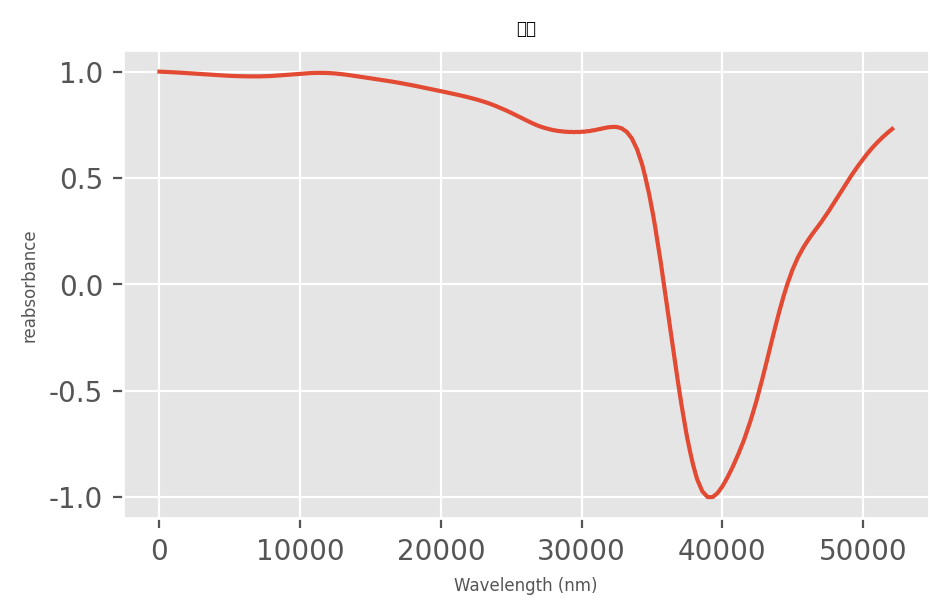

In [109]:
from pretreatment import Pretreatment as pre
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(CD_test[0], '演示', 0, 5).show()

In [221]:
np.savetxt("spearmanlike_index.csv",spearman_index,delimiter=',')

In [11]:
np.savetxt("spearmanlike.csv",spearman_index,delimiter=',',fmt='%.04f')

In [96]:
spearman_index=np.loadtxt("spearmanlike_index.csv",delimiter=',')


In [181]:
np.split(spearman_index,[-1],axis=0)[0][:6]

array([ 75., 247., 383., 386., 456.,  -1.])

In [192]:
np.where(spearman_index < 0)[0].shape

(9900,)

In [199]:
templete_index=np.split(spearman_index,np.where(spearman_index < 0)[0],axis=0)

In [225]:
templete_index[1].astype(np.int)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([-1,  0,  1,  5,  7,  9])

In [228]:
dihedral_57.shape

(10000, 57)

In [241]:
align_57=np.append(np.append(align_can,align_cac,axis=1),align_nc,axis=1)
testdihedral_57=dihedral_57

In [251]:
templete_index[0]

array([ 75., 247., 383., 386., 456.])

In [265]:
align_57[templete_index[0].astype(np.int)].reshape(5,57)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([[288.51, 218.55, 292.4 , 273.72, 262.93, 290.5 , 283.89, 275.46,
        117.83, 122.89, 297.4 , 191.86, 212.24, 100.75, 176.5 , 288.23,
        314.67, 285.62, 300.06, 173.55, 151.  ,   2.52, 351.9 , 349.44,
        355.96, 330.28, 340.07, 335.72,   4.01, 166.83, 166.19, 193.91,
        162.06,  22.12, 137.35, 161.29, 159.68, 148.21, 176.71, 172.57,
        200.94, 178.66, 177.63, 186.82, 169.85, 179.76, 186.17, 180.67,
          2.  , 178.3 , 169.44, 171.81, 188.29,   0.93, 356.03, 350.99,
        178.74],
       [231.22, 203.79, 322.34, 283.42, 297.01, 288.79, 271.04, 263.65,
        123.77, 107.05, 278.82, 190.81, 211.15, 109.68, 198.  , 290.46,
        285.34, 290.09, 252.51, 155.61, 140.26,  15.75, 311.54, 331.38,
        347.16, 344.19,   0.74, 318.66,  33.4 , 177.39, 165.72, 186.38,
        149.94,   8.26, 150.48, 163.42, 160.98, 135.84, 190.58, 189.5 ,
        184.61, 183.79, 165.78, 172.83, 169.22, 168.84, 190.56, 181.69,
        358.93, 174.57, 192.43, 173.71, 176.23,

In [271]:
a=np.array([[1,2],[3,4],[5,6]])
print(a)
print("*"*25)
a_1=np.insert(a,3,[1])#不加axis时，数据进行展开构成一维数组
print(a_1)
print("*"*25)
a_2=np.insert(a,2,[7,6],axis=0)
a_2

[[1 2]
 [3 4]
 [5 6]]
*************************
[1 2 3 1 4 5 6]
*************************


array([[1, 2],
       [3, 4],
       [7, 6],
       [5, 6]])

In [299]:
len(templete_index)

9901

In [304]:
savedihedral_57=[]
savelength=0
for i in tqdm(range(9900)):
    l=0
    for tempindex in templete_index[i].astype(int):
        
        
        if(tempindex!=-1):
            #print(align_57[tempindex])
            l=l+1
            savedihedral_57=np.append(savedihedral_57,align_57[tempindex],axis=0)
            
   
    savelength=np.append(savelength,l)
    

100%|█████████████████████████████████████████████████████████████████| 9900/9900 [01:23<00:00, 118.50it/s]


In [305]:
savedihedral_57.shape

(2787300,)

In [311]:
savelength[1:9900].min(2)

AxisError: axis 2 is out of bounds for array of dimension 1

In [208]:
np.array(templete_index[:-1])

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([array([ 75., 247., 383., 386., 456.]),
       array([-1.,  0.,  1.,  5.,  7.,  9.]),
       array([-1.,  0.,  1.,  5.,  7.,  9.]), ...,
       array([-1.000e+00,  4.500e+01,  7.370e+02,  8.770e+02,  9.570e+02,
               2.461e+03])                                               ,
       array([-1., 24., 37., 48., 87., 89.]),
       array([ -1.,  86., 103., 218., 258., 266.])], dtype=object)

In [263]:
x1=pd.Series(align_test[1].reshape(10417))
y1=pd.Series(CD_test[1].reshape(10417))
             
x1.corr(y1, 'spearman')

0.3503277084492527

In [254]:
align_test[1]

array([[0.10371933, 0.10371933, 0.10371933, ..., 0.10371936, 0.10371936,
        0.10371936]])

In [247]:
spearman.shape

(100,)

In [227]:
total_data = np.append(align_cd.T,test_UV_Data[:,:,:,1].reshape(10417,9900),axis=1)
total_data = DataFrame(align_cd[:10].T)
spearman=total_data.corr('spearman')
print(spearman)

          0         1         2         3         4         5         6  \
0  1.000000  0.191588  0.230049 -0.029383 -0.133587  0.036472 -0.106135   
1  0.191588  1.000000  0.354411  0.116558  0.074352  0.041742 -0.240102   
2  0.230049  0.354411  1.000000  0.034862 -0.100971  0.245547  0.102590   
3 -0.029383  0.116558  0.034862  1.000000 -0.169987  0.086649 -0.154415   
4 -0.133587  0.074352 -0.100971 -0.169987  1.000000 -0.078945  0.212466   
5  0.036472  0.041742  0.245547  0.086649 -0.078945  1.000000  0.058749   
6 -0.106135 -0.240102  0.102590 -0.154415  0.212466  0.058749  1.000000   
7  0.215666  0.164211  0.288999  0.228505 -0.106789  0.239999 -0.055220   
8  0.140761  0.213768  0.136248  0.011320  0.024380  0.202015 -0.231546   
9  0.109291  0.154447  0.237107 -0.004818  0.002053  0.038581  0.112451   

          7         8         9  
0  0.215666  0.140761  0.109291  
1  0.164211  0.213768  0.154447  
2  0.288999  0.136248  0.237107  
3  0.228505  0.011320 -0.004818  
4 -0

In [229]:
spearman=total_data.rank().corr('spearman')
print(spearman)

          0         1         2         3         4         5         6  \
0  1.000000  0.191588  0.230049 -0.029383 -0.133587  0.036472 -0.106135   
1  0.191588  1.000000  0.354411  0.116558  0.074352  0.041742 -0.240102   
2  0.230049  0.354411  1.000000  0.034862 -0.100971  0.245547  0.102590   
3 -0.029383  0.116558  0.034862  1.000000 -0.169987  0.086649 -0.154415   
4 -0.133587  0.074352 -0.100971 -0.169987  1.000000 -0.078945  0.212466   
5  0.036472  0.041742  0.245547  0.086649 -0.078945  1.000000  0.058749   
6 -0.106135 -0.240102  0.102590 -0.154415  0.212466  0.058749  1.000000   
7  0.215666  0.164211  0.288999  0.228505 -0.106789  0.239999 -0.055220   
8  0.140761  0.213768  0.136248  0.011320  0.024380  0.202015 -0.231546   
9  0.109291  0.154447  0.237107 -0.004818  0.002053  0.038581  0.112451   

          7         8         9  
0  0.215666  0.140761  0.109291  
1  0.164211  0.213768  0.154447  
2  0.288999  0.136248  0.237107  
3  0.228505  0.011320 -0.004818  
4 -0

In [227]:
dihedral_57=np.append(np.append(dihedral_CAN,dihedral_CCA,axis=1),dihedral_NC,axis=1)

In [53]:
if (torch.from_numpy(noh_y[:,indexoflength]).sum(axis=2)<torch.from_numpy(noh_y[:,indexofdist])).sum():
    print(1)


In [40]:
dihedral_y.shape

(10000, 19)

In [12]:
a=noh_y[:9900,:210]
b=noh_y[:9900,210:362]

In [41]:
angle=np.append(np.append(a,b,axis=1),dihedral_y[:9900],axis=1)

In [46]:
#0812光谱点信息
import numpy as np
import pandas as pd
largest_column_count=0
csv_file = '../data/0816/uv_inten.csv'
with open(csv_file, 'r') as temp_f:
    lines = temp_f.readlines()
    for l in lines:
        column_count = len(l.split(','))
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count
temp_f.close()
column_names = [i for i in range(0, largest_column_count)]

uv_inten = pd.read_csv('../data/0816/uv_inten.csv', header=None, delimiter=',', names=column_names).fillna(0).values
cd_inten = pd.read_csv('../data/0816/cd_inten.csv', header=None, delimiter=',', names=column_names).fillna(0).values
freq = pd.read_csv('../data/0816/freq.csv', header=None, delimiter=',', names=column_names).fillna(0).values
neicoor = np.loadtxt('../data/0816/内坐标（不含氢）.csv', skiprows=1, delimiter=',',encoding='UTF-8-sig')
dangle = np.loadtxt('../data/0816/三个关键二面角.csv', skiprows=1, delimiter=',',encoding='UTF-8-sig')

In [45]:
test_UV_Data=np.append(uv_inten,freq,axis=1).reshape(3000,1,2,2)
test_CD_Data=np.append(cd_inten,freq,axis=1).reshape(3000,1,2,2)

In [5]:
dangle.shape
dangle=np.deg2rad(dangle)
dangle_sin=np.sin(dangle)
dangle_cos=np.cos(dangle)
danglesc=np.append(dangle_sin,dangle_cos,axis=1)

In [42]:
dangle[:,0].std()

137.45654117660763

In [43]:
dangle[:,1].std()

9.783806642937549

In [44]:
dangle[:,2].std()

87.33365122219499

In [46]:
'''CD_Data=new_cd.reshape(9900,4,10417)
UV_Data=new_uv.reshape(9900,4,10417)'''
C_Data=np.append(neicoor,danglesc,axis=1)
#np.append(angle,dihedral_y[:9900,],axis=1)
#data_seqx,data_seqy=create_data(C_Data,16)
print(test_CD_Data.shape)
print(test_UV_Data.shape)
print(np.append(test_CD_Data,test_UV_Data,axis=1).shape)
"""z=C_Data
z[z>180]=360-z[z>180]"""

#CD_data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
C_data = C_Data[0]
print(C_Data.shape)
raw_data=torch.from_numpy(C_data)

(3000, 1, 2, 2)
(3000, 1, 2, 2)
(3000, 2, 2, 2)
(3000, 30)


In [50]:
C_Data.shape


(9900, 435)

In [12]:
raw_data=raw_data/100

In [48]:
#初始光谱信息
S_data=(np.append(test_CD_Data[0],test_UV_Data[0],axis=1))
raw_spectrum=torch.from_numpy(S_data.reshape(1,2,2,2))

In [134]:
raw_data.max()

NameError: name 'x' is not defined

In [47]:
#新的光谱提取模型输入
x=torch.from_numpy(np.append(test_CD_Data,test_UV_Data,axis=1)).to(torch.float32)
y=torch.from_numpy(C_Data).to(torch.float32)#直接输出坐标
#y[:,:303]=y[:,:302]/100
torch_dataset = Data.TensorDataset(x, y)
#torch_dataset = Data.TensorDataset(x, x_dist)#输出距离

train_size = int(len(torch_dataset) * 0.8)
validate_size = int(len(torch_dataset) * 0.1)
test_size = len(torch_dataset) - validate_size - train_size

train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(torch_dataset, [train_size, validate_size, test_size],generator=torch.Generator().manual_seed(23))


train_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)
val_loader = Data.DataLoader(
    dataset=validate_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)

In [43]:
projection = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv1d(in_channels=4,out_channels=256,kernel_size=167,stride=167,dilation=1),
            Rearrange('b e w -> b w e'),
        )

In [58]:
projection(x[:16]).shape

torch.Size([16, 62, 256])

In [171]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels: int = 2, patch_size: int = 1670, emb_size: int = 256, spe_size: int = 10417, patch: int = 167):
        self.patch_size = patch_size
        super().__init__()
        dilation=[1,2,3]
        self.projection1 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=in_channels,out_channels=emb_size,kernel_size=(patch_size,2),stride = patch),
            #nn.Conv1d(in_channels=in_channels,out_channels=emb_size,kernel_size=patch_size,stride=patch,dilation=dilation[0]),
            Rearrange('b e h w -> b (h w) e'),
        )
        """self.projection2 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=in_channels,out_channels=emb_size,kernel_size=(patch_size,2),stride = patch),
            #nn.Conv1d(in_channels=in_channels,out_channels=emb_size,kernel_size=patch_size,stride=patch,dilation=dilation[1]),
            Rearrange('b e h w -> b (h w) e'),
        )
        self.projection3 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=in_channels,out_channels=emb_size,kernel_size=(patch_size,2),stride = patch),
            #nn.Conv1d(in_channels=in_channels,out_channels=emb_size,kernel_size=patch_size,stride=patch,dilation=dilation[2]),
            Rearrange('b e h w -> b (h w) e'),
        )"""
        #self.weight=int((spe_size-dilation[0]*(patch_size-1)+1)/patch+1)+int((spe_size-dilation[1]*(patch_size-1)+1)/patch+1)+int((spe_size-dilation[2]*(patch_size-1)+1)/patch+1)
        #print(int((spe_size-dilation[2]*(patch_size-1)+1)/patch_size+1))
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        # 位置编码信息，一共有(img_size // patch_size)**2 + 1(cls token)个位置向量
        self.positions = nn.Parameter(torch.randn(54, emb_size))
        
        
        
    def forward(self, x) :
        b, _, _,_ = x.shape
        #print(x.shape)
        """x1 = self.projection1(x)
        #print(x1.shape)
        x2 = self.projection2(x)
        #print(x2.shape)
        x3 = self.projection3(x)
        #print(x3.shape)
        x2 = torch.cat([x1, x2], dim=1)"""
        
        x = self.projection1(x)
         
        #print(self.weight)
        #print(x.shape)
        cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=b)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # add position embedding
        #print(x.shape, self.positions.shape)
        x += self.positions
        return x

In [75]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels: int = 2, patch_size: int = 1670, emb_size: int = 256, spe_size: int = 10417, patch: int = 167):
        self.patch_size = patch_size
        super().__init__()
        dilation=[1,2,3]
        self.projection1 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            #nn.Conv1d(in_channels=2,out_channels=emb_size,kernel_size=(1,2),stride=2),
            nn.Conv2d(in_channels=2,out_channels=emb_size,kernel_size=(2,1),stride=1),
            #nn.Conv1d(in_channels=in_channels,out_channels=emb_size,kernel_size=patch_size,stride=patch,dilation=dilation[0]),
            Rearrange('b e h w -> b (h w) e'),
        )

      
        #self.weight=int((spe_size-dilation[0]*(patch_size-1)+1)/patch+1)+int((spe_size-dilation[1]*(patch_size-1)+1)/patch+1)+int((spe_size-dilation[2]*(patch_size-1)+1)/patch+1)
        #print(int((spe_size-dilation[2]*(patch_size-1)+1)/patch_size+1))
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        # 位置编码信息，一共有(img_size // patch_size)**2 + 1(cls token)个位置向量
        self.positions = nn.Parameter(torch.randn(3, emb_size))
        
        
        
    def forward(self, x) :
        b, _, _,_= x.shape
        #print(x.shape)
        """x1 = self.projection1(x)
        #print(x1.shape)
        x2 = self.projection2(x)
        #print(x2.shape)
        x3 = self.projection3(x)
        #print(x3.shape)
        x2 = torch.cat([x1, x2], dim=1)"""
        
        x = self.projection1(x)
         
        #print(self.weight)
        #print(x.shape)
        cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=b)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # add position embedding
        #print(x.shape, self.positions.shape)
        x += self.positions
        return x

In [70]:
test=x[:32,:,:,:]
newinput=PatchEmbedding()(test)
newinput.shape

torch.Size([32, 2, 256])


torch.Size([32, 3, 256])

In [64]:
 nn.Conv2d(in_channels=2,out_channels=256,kernel_size=(1,2),stride=1)(test).shape

torch.Size([32, 256, 2, 1])

In [ ]:
newinput.shape

In [138]:
Attention(dim=256,heads=2)(newinput).shape

torch.Size([32, 54, 256])

In [148]:
pairinput=OuterMean(dim=256)(newinput)

In [142]:
AxialAttention(dim=256,heads=8,dim_head = 64, row_attn = True, col_attn = False, accept_edges = True)(newinput).shape

torch.Size([8, 4, 54, 256])

In [151]:
PairwiseAttentionBlock(dim=256,seq_len=1024,heads=8,dim_head=64)(pairinput).shape

torch.Size([8, 54, 54, 256])

In [ ]:
PairwiseAttentionBlock()

In [84]:
projection = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=2,out_channels=256,kernel_size=(1670,2),stride = 167),
            nn.BatchNorm2d(256),
            Rearrange('b e h w -> b  (h w) e')
        )

In [93]:
PatchEmbedding()(x[:16]).shape

torch.Size([16, 54, 256])

In [132]:
pro=nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=2,out_channels=256,kernel_size=(100,2)),
            
            Rearrange('b e h w -> b   e (h w)'),
            nn.Conv1d(in_channels=256,out_channels=32,kernel_size=100),
            nn.MaxPool1d(50,stride=10,ceil_mode=True),
            nn.Conv1d(in_channels=32,out_channels=1,kernel_size=100),
    
            nn.BatchNorm1d(1),
)

In [133]:
pro(x[:16]).shape

torch.Size([16, 1, 919])

In [120]:
# pre-layernorm

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)


In [119]:
# projecting CLS tokens, in the case that small and large patch tokens have different dimensions

class ProjectInOut(nn.Module):
    def __init__(self, dim_in, dim_out, fn):
        super().__init__()
        self.fn = fn

        need_projection = dim_in != dim_out
        self.project_in = nn.Linear(dim_in, dim_out) if need_projection else nn.Identity()
        self.project_out = nn.Linear(dim_out, dim_in) if need_projection else nn.Identity()

    def forward(self, x, *args, **kwargs):
        x = self.project_in(x)
        x = self.fn(x, *args, **kwargs)
        x = self.project_out(x)
        return x


In [ ]:
ProjectInOut(256, 256, PreNorm(256, MultiHeadAttention(256, num_heads = 8, dropout = 0.1)))(PatchEmbedding()(x[:16]))

In [11]:
class MultiHeadAttention(nn.Module):
    def __init__(self, emb_size: int = 256, num_heads: int = 8, dropout: float = 0.1):
        super().__init__()
        self.emb_size = emb_size
        self.num_heads = num_heads
        # fuse the queries, keys and values in one matrix
        self.qkv = nn.Linear(emb_size, emb_size * 3)
        self.att_drop = nn.Dropout(dropout)
        self.projection = nn.Linear(emb_size, emb_size)
        
    def forward(self, x : Tensor, mask: Tensor = None) -> Tensor:
        # split keys, queries and values in num_heads
        #print("1qkv's shape: ", self.qkv(x).shape)
        qkv = rearrange(self.qkv(x), "b n (h d qkv) -> (qkv) b h n d", h=self.num_heads, qkv=3)
        #print("2qkv's shape: ", qkv.shape)
        
        queries, keys, values = qkv[0], qkv[1], qkv[2]
        #print("queries's shape: ", queries.shape)
        #print("keys's shape: ", keys.shape)
        #print("values's shape: ", values.shape)
        
        # sum up over the last axis
        energy = torch.einsum('bhqd, bhkd -> bhqk', queries, keys) # batch, num_heads, query_len, key_len
        #print("energy's shape: ", energy.shape)
        if mask is not None:
            fill_value = torch.finfo(torch.float32).min
            energy.mask_fill(~mask, fill_value)
        
        scaling = self.emb_size ** (1/2)
        #print("scaling: ", scaling)
        att = F.softmax(energy, dim=-1) / scaling
        #print("att1' shape: ", att.shape)
        att = self.att_drop(att)
        #print("att2' shape: ", att.shape)
        
        # sum up over the third axis
        out = torch.einsum('bhal, bhlv -> bhav ', att, values)
        #print("out1's shape: ", out.shape)
        out = rearrange(out, "b h n d -> b n (h d)")
        #print("out2's shape: ", out.shape)
        out = self.projection(out)
        #print("out3's shape: ", out.shape)
        return out
    
class ResidualAdd(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn
        
    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x
    
class FeedForwardBlock(nn.Sequential):
    def __init__(self, emb_size: int, expansion: int = 4, drop_p: float = 0.):
        super().__init__(
            nn.Linear(emb_size, expansion * emb_size),
            nn.GELU(),
            nn.Dropout(drop_p),
            nn.Linear(expansion * emb_size, emb_size),
        )

class TransformerEncoderBlock(nn.Sequential):
    def __init__(self,
                 emb_size: int = 256,
                 drop_p: float = 0.,
                 forward_expansion: int = 4,
                 forward_drop_p: float = 0.,
                 ** kwargs):
        super().__init__(
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                MultiHeadAttention(emb_size, **kwargs),
                nn.Dropout(drop_p)
            )),
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                FeedForwardBlock(
                    emb_size, expansion=forward_expansion, drop_p=forward_drop_p),
                nn.Dropout(drop_p)
            )
            ))        

In [12]:
class TransformerEncoder(nn.Sequential):
    def __init__(self, depth: int = 12, **kwargs):
        super().__init__(*[TransformerEncoderBlock(**kwargs) for _ in range(depth)])

In [13]:
class ClassificationHead(nn.Sequential):
    def __init__(self, emb_size: int = 54, n_classes: int = 256):
        super().__init__(
            Reduce('b n e -> b e', reduction='max'),
            nn.LayerNorm(emb_size), 
            nn.Linear(emb_size, n_classes))

In [43]:
patches_embedded = PatchEmbedding()(x[:16])
print("patches_embedding's shape: ", patches_embedded.shape)
y=MultiHeadAttention(num_heads = 8)(patches_embedded)
y.shape

patches_embedding's shape:  torch.Size([16, 130, 256])


torch.Size([16, 130, 256])

In [72]:
ClassificationHead()(y).shape

torch.Size([16, 1000])

In [26]:
PatchEmbedding()(x[:16]).shape

torch.Size([16, 54, 256])

In [31]:
detailspe_net=nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv1d(in_channels=4,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=1,kernel_size=100),
            nn.BatchNorm1d(1),
            
        )

In [32]:
summary(detailspe_net.cuda(),input_size=(4,10417))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1            [-1, 64, 10318]          25,664
         MaxPool1d-2             [-1, 64, 5135]               0
            Conv1d-3             [-1, 64, 5036]         409,664
         MaxPool1d-4             [-1, 64, 2494]               0
            Conv1d-5             [-1, 64, 2395]         409,664
         MaxPool1d-6             [-1, 64, 1174]               0
            Conv1d-7              [-1, 1, 1075]           6,401
       BatchNorm1d-8              [-1, 1, 1075]               2
Total params: 851,395
Trainable params: 851,395
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.16
Forward/backward pass size (MB): 12.98
Params size (MB): 3.25
Estimated Total Size (MB): 16.39
----------------------------------------------------------------


In [14]:
class Generator(nn.Module):

    def __init__(self,     
                in_channels: int = 2,
                patch_size: int = 1670,
                emb_size: int = 456,
                spe_size: int = 10417,
                depth: int = 12,
                n_classes: int = 1024,
                **kwargs):
        super(Generator, self).__init__()
        h_dim=512
        self.conf_net = nn.Sequential(
            
            nn.Linear(456, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 512),
        )
        self.spe_net = nn.Sequential(
            PatchEmbedding(in_channels, patch_size, emb_size, spe_size),
            TransformerEncoder(depth, emb_size=emb_size, **kwargs),
            ClassificationHead(emb_size, n_classes)
        )

        self.detailspe_net=nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv1d(in_channels=4,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=64,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=64,out_channels=1,kernel_size=100),
            nn.BatchNorm1d(1),
            
        )
        
        
        self.concat_net=nn.Linear(1075,512)
        
        self.changedim = nn.Linear((1024+512)*2,512)
        
        self.output1_net=nn.Sequential(
            nn.Linear(1024,912),#303代表内坐标中二面角数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,152)
        )
        

        
        self.output2_net=nn.Sequential(
            nn.Linear(1024,912),#565代表2跳坐标数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,151)
        )
        self.output3_net=nn.Sequential(
            nn.Linear(1024,912),#912代表坐标数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,153)
        )
        
     

        

    def forward(self, z,raw_data,raw_spectrum):
        #print(z.shape)
        signs=self.spe_net(z)
        detail_sign=self.detailspe_net(z).view(signs.size()[0],-1)
        detailsign=self.concat_net(detail_sign)
        out_signs=torch.cat((signs,detailsign),1)
        
        
        raw_signs = self.spe_net(raw_spectrum).repeat(signs.size()[0],1)
        raw_detail_signs = self.detailspe_net(raw_spectrum).view(1,-1).repeat(signs.size()[0],1)
        raw_detailsigns = self.concat_net(raw_detail_signs)
        out_rawsigns=torch.cat((raw_signs,raw_detailsigns),1)
        
        #修改信号之间为cross attention
        
        
        
        
        
        
        
        
        
        
        
        
        #有构象
        output2 = self.changedim(torch.cat((out_signs,out_rawsigns),1))
        output1 = self.conf_net(raw_data).repeat(signs.size()[0],1)
        bf_out = torch.cat((output1,output2),1)
        #bf_out = output2#测试一下光谱的信息
        
        angle=self.output1_net(bf_out)
        dangle=self.output2_net(bf_out)
        bond=self.output3_net(bf_out)

        
        #无构象
        #ordinate=self.out(signs)
        
        angle=torch.cat((angle,dangle),1)
        
        return torch.cat((angle,bond),1)


In [15]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        h_dim=256
        self.conf_net = nn.Sequential(
            nn.Linear(456, h_dim),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 256)

        )
        
        self.sign_net = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv1d(in_channels=4,out_channels=512,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=100),
            nn.MaxPool1d(50,stride=2,ceil_mode=True),
            nn.Conv1d(in_channels=512,out_channels=1,kernel_size=100),
            nn.BatchNorm1d(1),
            
        )
        self.changedim = nn.Linear(1075,256)
        self.output_net=nn.Sequential(
            nn.Linear(512,1),
            nn.Sigmoid()
        )

    def forward(self, sign, conf):
        output1 = self.conf_net(conf)
        output2 = self.sign_net(sign).view(-1,1075)
        output2 = self.changedim(output2)
        bf_out = torch.cat((output1,output2),1)
        out = self.output_net(bf_out)
        return out.view(-1)

In [16]:
class Generator(nn.Module):

    def __init__(self,     
                in_channels: int = 2,
                patch_size: int = 1670,
                emb_size: int = 912,
                spe_size: int = 10417,
                depth: int = 12,
                n_classes: int = 1024,
                **kwargs):
        super(Generator, self).__init__()
        h_dim=512
        self.conf_net = nn.Sequential(
            
            nn.Linear(906, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 512),
        )
        self.spe_net = nn.Sequential(
            PatchEmbedding(in_channels, patch_size, emb_size, spe_size),
            TransformerEncoder(depth, emb_size=emb_size, **kwargs),
            ClassificationHead(emb_size, n_classes)
        )

        self.detailspe_net=nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=2,out_channels=256,kernel_size=(100,2)),
            
            Rearrange('b e h w -> b   e (h w)'),
            nn.Conv1d(in_channels=256,out_channels=32,kernel_size=100),
            nn.MaxPool1d(50,stride=10,ceil_mode=True),
            nn.Conv1d(in_channels=32,out_channels=1,kernel_size=100),
    
            nn.BatchNorm1d(1),
)
        
        
        #self.concat_net=nn.Linear(919,512)
        
        self.changedim = nn.Linear((1024)*2,1024)
        
        self.output1_net=nn.Sequential(
            nn.Linear(1024,912),#303代表内坐标中二面角数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,15)
        )
        
        self.output2_net=nn.Sequential(
            nn.Linear(1024,912),#565代表2跳坐标数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,9)
        )
        self.output3_net=nn.Sequential(
            nn.Linear(1024,912),#565代表2跳坐标数
            nn.ReLU(),
            nn.Linear(912,906),
            nn.ReLU(),
            nn.Linear(906,6)
        )
        
       
     

        

    def forward(self, z,raw_data,raw_spectrum):
        #print(z.shape)
        signs=self.spe_net(z)
        #detail_sign=self.detailspe_net(z).view(signs.size()[0],-1)
        #detailsign=self.concat_net(detail_sign)
        
        out_signs=signs
        
        
        raw_signs = self.spe_net(raw_spectrum).repeat(signs.size()[0],1)
        #raw_detail_signs = self.detailspe_net(raw_spectrum).view(1,-1).repeat(signs.size()[0],1)
        #raw_detailsigns = self.concat_net(raw_detail_signs)
        out_rawsigns=raw_signs
        

        #有构象
        output2 = self.changedim(torch.cat((out_signs,out_rawsigns),1))
        #output1 = self.conf_net(raw_data).repeat(signs.size()[0],1)
        #bf_out = torch.cat((output1,output2),1)
        bf_out = output2#测试一下光谱的信息
        
        angle=self.output1_net(bf_out)
        bondlen = self.output2_net(bf_out)
        dist = self.output3_net(bf_out)
        
        
        ordinate=torch.cat((angle,bondlen),1)
        output=torch.cat((ordinate,dist),1)
        
        
        return output+raw_data.repeat(signs.size()[0],1)


In [46]:
y.shape

torch.Size([3000, 27])

In [90]:
cuda_index=7
testx=x[:32,:,:].cuda(cuda_index)
confinf=y[:32,:].cuda(cuda_index)
init_conformation = raw_data.reshape(1,30).to(torch.float32).cuda(cuda_index)
init_spectrum = raw_spectrum.to(torch.float32).cuda(cuda_index)
        

Generator().cuda(cuda_index)(testx,init_conformation,init_spectrum).shape

torch.Size([32, 30])

In [85]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        h_dim=256
        self.conf_net = nn.Sequential(
            nn.Linear(30, h_dim),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 256)

        )
        
        self.sign_net=nn.Sequential(
            
            # using a conv layer instead of a linear one -> performance gains
            #nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            nn.Conv2d(in_channels=2,out_channels=256,kernel_size=(2,1),stride=1),
            #nn.Conv1d(in_channels=in_channels,out_channels=emb_size,kernel_size=patch_size,stride=patch,dilation=dilation[0]),
            Rearrange('b e h w -> b (h w e) '),
        
)
        
        self.changedim = nn.Linear(512,256)
        self.output_net=nn.Sequential(
            nn.Linear(512,1),
            nn.Sigmoid()
        )

    def forward(self, sign, conf):
        output1 = self.conf_net(conf)
        output2 = self.sign_net(sign)
        output2 = self.changedim(output2)
        bf_out = torch.cat((output1,output2),1)
        out = self.output_net(bf_out)
        return out.view(-1)

In [18]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        # m.weight.data.normal_(0.0, 0.02)
        nn.init.kaiming_normal_(m.weight)
        m.bias.data.fill_(0)
        
def gradient_penalty(batchsz,D,sign, xr, xf):
    """
    :param D:
    :param xr:
    :param xf:
    :return:
    """
    LAMBDA = 0.3

    # only constrait for Discriminator
    xf = xf.detach()
    xr = xr.detach()

    # [b, 1] => [b, 2]
    alpha = torch.rand(batchsz, 1).cuda(2)
    alpha = alpha.expand_as(xr)

    interpolates = alpha * xr + ((1 - alpha) * xf)
    interpolates.requires_grad_()

    disc_interpolates = D(sign,interpolates)

    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones_like(disc_interpolates),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

    gp = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA

    return gp

def coordinate_loss(x,y):
    x=x.view(-1,304,3)
    x_distances = torch.cdist(x,x,p=2)
    y=y.view(-1,304,3)
    y_distances = torch.cdist(y,y,p=2)
    #distances = torch.cdist(t,t,p=2)
    b_mask=mask.repeat(y.size()[0],1,1)
    x_dist=torch.masked_select(x_distances,b_mask).view(x.size()[0],-1)
    y_dist=torch.masked_select(y_distances,b_mask).view(y.size()[0],-1)
    
    #distances = torch.cdist(x_distances, y_distances, p=2)
    l1_loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
    return l1_loss_fn(x_dist,y_dist)

def dist_loss(x,y):
    l1_loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
    return l1_loss_fn(x,y)

In [19]:
def train_loss(x,y):
    l2_loss_fn = torch.nn.SmoothL1Loss(reduce=False, size_average=True)
    return l2_loss_fn(x,y)

In [63]:
#根据索引来判断结果中距离列的合理性
indexofdist=[]
indexoflength=[]
false=torch.zeros(1).cuda(2)
true=torch.ones(1).cuda(2)
for i in range(3,116,2):
    indexofdist.append(i)
    if i == 3:
        indexoflength.append((0,1,2))
    if i == 5:
        indexoflength.append((1,2,4))
    if i > 5:
        indexoflength.append((i-5,i-3,i-1))
    #indexoflength.append((i-3,i-2,i-1))
def checkifwrong(inputtensor):
    if (inputtensor[:,indexofdist]>inputtensor[:,indexoflength].sum(axis=2)).sum():
        return false
    return true

In [40]:
len(indexoflength)

114

In [43]:
xchange[:,indexoflength].shape

torch.Size([16, 57, 3])

In [46]:
init_conformation=init_conformation.view(1,304,3)
distances = torch.cdist(init_conformation,init_conformation,p=2).view(init_conformation.size()[0],-1)
torch.cdist(distances,distances,p=2).view(distances.size()[0],-1).mean().mean()

NameError: name 'init_conformation' is not defined

In [20]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint27.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            				   上次验证集损失值改善后等待几个epoch
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
            					如果是True，为每个验证集损失值改善打印一条信息
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            					检测数量的最小变化，以符合改进的要求
                           Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.
        验证损失减少时保存模型
        '''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # 这里会存储迄今最优的模型
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [24]:


data = np.ones(shape=[2,3])*2
data = torch.from_numpy(data)

In [25]:
data

tensor([[2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)

In [26]:
data*data

tensor([[4., 4., 4.],
        [4., 4., 4.]], dtype=torch.float64)

In [47]:
init_conformation = raw_data.reshape(1,435).to(torch.float32).cuda(2)
init_spectrum = raw_spectrum.to(torch.float32).cuda(2)

In [21]:
def cossin2angle(testsin,testcos):
    testangle=torch.rad2deg(torch.arctan(testsin/testcos))
    outangle=torch.where(testcos<0,testangle+180,testangle)
    outangle=torch.where((testsin<0)&(testcos>0),outangle+360,outangle)
    return outangle


In [101]:
dangle_tensor=torch.from_numpy(dangle).to(torch.float32).cuda(2)

In [118]:
cossin2angle(y[:,24:27],y[:,27:])

tensor([[175.1600, 182.3300, 200.4100],
        [175.3000, 167.8600, 206.9800],
        [139.4900, 173.2800, 210.1400],
        ...,
        [353.7600, 183.7600,  58.7100],
        [327.9800, 202.4800,  56.3200],
        [336.4000, 187.9100,  93.1100]])

In [105]:
(dangle_tensor-cossin2angle(y[:,24:27],y[:,27:]).cuda(2)).max()

tensor(356.5407, device='cuda:2')

In [107]:
dangle_tensor

tensor([[175.1600, 182.3300, 200.4100],
        [175.3000, 167.8600, 206.9800],
        [139.4900, 173.2800, 210.1400],
        ...,
        [353.7600, 183.7600,  58.7100],
        [327.9800, 202.4800,  56.3200],
        [336.4000, 187.9100,  93.1100]], device='cuda:2')

In [86]:
torch.manual_seed(23)
np.random.seed(23)

G = Generator().cuda(2)
D = Discriminator().cuda(2)
G.apply(weights_init)
#G.load_state_dict(torch.load("checkpoint.pt"))
D.apply(weights_init)

"""optim_G = optim.SGD(G.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)
optim_D = optim.SGD(D.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)"""
optim_G  = optim.Adam(G.parameters(), lr=5e-4,betas=(0.5,0.9))
optim_D  = optim.Adam(D.parameters(), lr=5e-4,betas=(0.5,0.9))

early_stopping = EarlyStopping(patience = 5, verbose = True)
init_conformation = raw_data.reshape(1,30).to(torch.float32).cuda(2)
init_spectrum = raw_spectrum.to(torch.float32).cuda(2)

#viz.line([[0,0]], [0], win='loss', opts=dict(title='loss',legend=['D', 'G']))

for epoch in range(200):
    
    G.train()
    # 1. train discriminator for k steps
    for _ in range(3):
        #x = next(data_iter)
        for batch_x,y in train_loader:
            #print(batch_x.shape)
            coor = y.to(torch.float32).cuda(2)#坐标信息
            z = batch_x.to(torch.float32).cuda(2)#光谱

            #print(coor.shape)
            
            """coor_dst=torch.cdist(coor,coor,p=2)
            c_mask=mask3.repeat(z.size()[0],1,1)
            x_dist=torch.masked_select(coor_dst,c_mask).view(z.size()[0],-1)"""
            # [b,1] 
            predr = D(z,coor)
            # max log(lossr)
            lossr = - (predr.mean())

            # [b, 2]
            
            # stop gradient on G
            # [b, 41668]
            xf = G(z,init_conformation,init_spectrum).detach()# stop gradient
            # [b]
            predf = (D(z,xf))
            # min predf
            lossf = (predf.mean())
            #print(z.size()[0])
            # gradient penalty
            gp = gradient_penalty(z.size()[0],D,z, coor, xf)
            
            
            loss_D = lossr + lossf 
            
            
            #   optimize
            optim_D.zero_grad()
            loss_D.backward()
            # for p in D.parameters():
            #     print(p.grad.norm())
            optim_D.step()


    # 2. train Generator
    lossdprint=0
    printi=0
    for batch_x,batch_y in train_loader:
        
        z = batch_x.to(torch.float32).cuda(2)
        confinf = batch_y.to(torch.float32).cuda(2)
        
        #计算出变化，预测变化而不是直接预测构象
        init_conformation.repeat(confinf.size()[0],1)
        change_target=confinf
        
        
        
        
        """coor_dst=torch.cdist(batch_y1,batch_y1,p=2)#真实原子间所有距离
        c_mask1=mask1.repeat(z.size()[0],1,1)
        x_dist1=torch.masked_select(coor_dst,c_mask1).view(z.size()[0],-1)
        c_mask2=mask2.repeat(z.size()[0],1,1)
        x_dist2=torch.masked_select(coor_dst,c_mask2).view(z.size()[0],-1)
        c_mask3=mask3.repeat(z.size()[0],1,1)
        x_dist3=torch.masked_select(coor_dst,c_mask3).view(z.size()[0],-1)
        
        angle=confinf[:,:152]
        dangle=confinf[:,152:303]
        bond=confinf[:,303:]
        """
        
        #三种距离都生成
        #xf1 = G(z,init_conformation,1)
        xchange = G(z,init_conformation,init_spectrum)
       
        
        predf = (D(z,xchange))
        # max predf
        
  
        
        lossd1=dist_loss(xchange[:,:15],change_target[:,:15]).mean()
        
        #lossd2=dist_loss(xchange,change_target).mean()
        lossd3=dist_loss(xchange[:,15:24],change_target[:,15:24]).mean()
        lossd4=dist_loss(xchange[:,24:27],change_target[:,24:27]).mean()
        lossd2=dist_loss(xchange[:,27:]*xchange[:,27:],(1-(xchange[:,24:27]*xchange[:,24:27]))).mean()
        #losserror=checkifwrong(xchange)
        lossp=- (predf.mean())
        loss_G = lossp  +lossd4+lossd3+lossd2
        lossdprint=lossd4.item()+lossdprint
        printi=printi+1
        
        
        
        
        #optimize
        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()
    G.eval()
    with torch.no_grad():
        lossprint=0
        lossprinta=0
        printj=0
        for val_x,val_y in val_loader:
            vz = val_x.to(torch.float32).cuda(2)
            vconfinf = val_y.to(torch.float32).cuda(2)
            #预测改变量
            init_conformation.repeat(vconfinf.size()[0],1)
            vchange_target=vconfinf
            

            
            # 测试模型
            vxchange = G(vz,init_conformation,init_spectrum)

            # 计算损失
            lossd = dist_loss(vxchange[:,15:24],vchange_target[:,15:24]).mean()
            
            lossndist = dist_loss(vxchange[:,:15],vchange_target[:,:15]).mean()
            xdangle=cossin2angle(vxchange[:,24:27],vxchange[:,27:])
            dangle=cossin2angle(vconfinf[:,24:27],vconfinf[:,27:])
            lossndiheral = dist_loss(xdangle,dangle).mean()
            #lossdist = dist_loss(vxchange[:,indexofdist],vchange_target[:,indexofdist]).mean()
            lossprint=lossprint+lossndiheral.item()
            lossprinta=lossndist.item()+lossprinta
            printj=printj+1
            
    print(epoch ,lossf.item(),lossd1.item(),lossd3.item(),lossd3.item(),lossdprint/printi)
    if epoch % 4 == 0:
        #viz.line([[loss_D.item(), loss_G.item()]], [epoch], win='loss', update='append')

        #generate_image(D, G, xr, epoch)
        
        print('valloss:',epoch ,lossprint/printj,lossprinta/printj)
        early_stopping(lossprint/printj, G)
        # 若满足early stopping 要求
        if early_stopping.early_stop:
            print("Early Stopping!")
            # 结束模型训练
            break

0 0.0 46.76226806640625 0.36893510818481445 0.36893510818481445 2.059216936429342
valloss: 0 113.39796487908615 48.29612089458265
Validation loss decreased (inf --> 113.397965).  Saving model ...
1 0.0 46.79396438598633 0.1823844611644745 0.1823844611644745 0.9218930143117905
2 0.0 47.23231506347656 0.10535334050655365 0.10535334050655365 0.5893972611427307
3 0.0 47.10720443725586 0.02072957158088684 0.02072957158088684 0.4705939052502314
4 0.0 47.107139587402344 0.02071491628885269 0.02071491628885269 0.444580055475235
valloss: 4 68.20400057340923 48.58059049907484
Validation loss decreased (113.397965 --> 68.204001).  Saving model ...
5 0.0 47.10700988769531 0.02070816047489643 0.02070816047489643 0.4385103040933609
6 0.0 47.107032775878906 0.02064972184598446 0.02064972184598446 0.43298842827479045
7 0.0 47.10713195800781 0.02063974179327488 0.02063974179327488 0.43018725792566936
8 0.0 47.107269287109375 0.02066764235496521 0.02066764235496521 0.42912777920564016
valloss: 8 67.3890

In [16]:
torch.save(G, 'dist_model1.pkl') #最初的距离模型

In [38]:
torch.save(G, 'nei_model2.pkl') #修改只有光谱输入后的内坐标模型

In [43]:
torch.save(G, 'nei_model3.pkl') #修改有原始构象和光谱输入后的内坐标模型

In [122]:
torch.save(G, 'vit_model3.pkl') #归一化+vit组成的模组,50轮好像还没收敛，效果在33左右

In [145]:
torch.save(G, 'vit_model2.pkl') #归一化+vit+绝对值二面角组成的模组,50轮好像还没收敛，效果在26左右

In [26]:
torch.save(G, 'vit_model1.pkl') #归一化+vit+绝对值二面角组成的模组,增多了隐层神经元的数量,60轮收敛，效果27

In [25]:
torch.save(G, 'vitlinear_model1.pkl') #归一化+vit提取波峰波谷形状+低感受域卷积层提取局部微小特征+绝对值二面角组成的模组,增多了隐层神经元的数量,260轮训练，效果未知

In [67]:
init_conformation.shape

torch.Size([1, 382])

In [83]:
tsne_data=G.spe_net(ran_spectrum)

In [87]:
G=Generator().cuda(2)
G.load_state_dict(torch.load("checkpoint27.pt"))
G

Generator(
  (conf_net): Sequential(
    (0): Linear(in_features=906, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=512, out_features=512, bias=True)
  )
  (spe_net): Sequential(
    (0): PatchEmbedding(
      (projection1): Sequential(
        (0): Conv2d(2, 912, kernel_size=(2, 1), stride=(1, 1))
        (1): Rearrange('b e h w -> b (h w) e')
      )
    )
    (1): TransformerEncoder(
      (0): TransformerEncoderBlock(
        (0): ResidualAdd(
          (fn): Sequential(
            (0): LayerNorm((912,), eps=1e-05, elementwise_affine=True)
            (1): MultiHeadAttention(
              (qkv): Linear(in_features=912, out_features=2736, bias=True)
              (att_drop): Dr

In [25]:
ran_cd=np.loadtxt('../data/0715/random_gen_CD3.csv',dtype=np.float,delimiter=',').reshape(100,1,10417,1)
ran_uv=np.loadtxt('../data/0715/random_gen_UV3.csv',dtype=np.float,delimiter=',').reshape(100,1,10417,1)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [182]:
ran_uv

array([[[[0.00000000e+00],
         [4.01659336e-07],
         [8.03964123e-07],
         ...,
         [5.97801518e-03],
         [5.97137874e-03],
         [5.96474608e-03]]],


       [[[0.00000000e+00],
         [1.52202288e-06],
         [3.04514671e-06],
         ...,
         [3.35124372e-03],
         [3.34802992e-03],
         [3.34482030e-03]]],


       [[[2.42167149e-03],
         [2.41272646e-03],
         [2.40378104e-03],
         ...,
         [2.25660311e-03],
         [2.25284810e-03],
         [2.24909618e-03]]],


       ...,


       [[[1.91077562e-03],
         [1.92702852e-03],
         [1.94328503e-03],
         ...,
         [2.21055463e-03],
         [2.20743129e-03],
         [2.20431367e-03]]],


       [[[0.00000000e+00],
         [4.67437364e-07],
         [9.34992314e-07],
         ...,
         [6.43239343e-03],
         [6.42475467e-03],
         [6.41712842e-03]]],


       [[[0.00000000e+00],
         [9.23592674e-08],
         [1.84843485e-07],
     

In [151]:
test_CD_Data[:100,:,:,0].reshape(100,1,10417,1)

array([[[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]],

       [[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]],

       [[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]]])

In [150]:
test_CD_Data[:3,:,:,0]

array([[[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]],

       [[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]],

       [[239.99232025, 239.98464098, 239.97696221, ..., 180.00720029,
         180.00288005, 179.99856001]]])

In [26]:
ran_cd2d=np.append(test_CD_Data[:100,:,:,0].reshape(100,1,10417,1),ran_cd,axis=3)
ran_uv2d=np.append(test_UV_Data[:100,:,:,0].reshape(100,1,10417,1),ran_uv,axis=3)
ran_spectrum=torch.from_numpy(np.append(ran_cd2d,ran_uv2d,axis=1)).to(torch.float32).cuda(2)

In [32]:
p.PlotSpectrum(ran_cd2d[1,0,:,0].reshape(1,10417), '演示', 0, 0.1).show()

NameError: name 'ran_cd2d' is not defined

In [163]:
ran_cd2d[0,0,:,1].shape

torch.Size([10417])

In [170]:
xconf[:,:210]=xconf[:,:210]+11
xconf[:,381:]=xconf[:,381:]+11

In [28]:
G.eval()
xconf = G(ran_spectrum,init_conformation,init_spectrum)

In [64]:
ran_spectrum.shape

torch.Size([100, 2, 10417, 2])

In [31]:
xconf_save = xconf.cpu().detach().numpy()
np.savetxt("ran_conf.csv",xconf_save,delimiter=',',fmt='%.04f')

In [30]:
xconf.min()

tensor(1.2086, device='cuda:2', grad_fn=<MinBackward1>)

In [89]:
l2_loss_fn = torch.nn.L1Loss(reduce=False, size_average=True)

In [92]:
#测试集样本结果
test_loader = Data.DataLoader(
    dataset=test_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)

In [89]:
G.eval()

z= testx.to(torch.float32).cuda(1).view(-1,4,10417)
confinf = testy.to(torch.float32).cuda(1).view(-1,356)
xconf = G(z,init_conformation,init_spectrum)

ValueError: too many values to unpack (expected 2)

In [147]:
sum_spectrum=save_spectrum[200:300].cuda(1)

In [164]:
input_spectrum=torch.mean(sum_spectrum.reshape(25,4,8,10417), dim=1, keepdim=True).reshape(25,8,10417).cuda(2)

In [149]:
xconf = G(input_spectrum,init_conformation,init_spectrum)

In [167]:
input_spectrum[:,1,:].shape

torch.Size([25, 10417])

In [172]:
xconf_save = input_spectrum[:,5,:].cpu().detach().numpy()
np.savetxt("mean_uv.csv",xconf_save,delimiter=',',fmt='%.04f')

In [67]:
for val_x,val_y in test_loader:
    val_x
    print(val_x.shape)

torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([

torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([

torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([1, 8, 10417])
torch.Size([

In [93]:
G.eval()
with torch.no_grad():
    lossprint1=0
    lossprint2=0
    lossprint3=0
    printj=0
    for val_x,val_y in test_loader:
        z = val_x.to(torch.float32).cuda(2)
        confinf = val_y.to(torch.float32).cuda(2)

            
        # 测试模型
        xconf = G(z,init_conformation,init_spectrum)
        
        #x_tsne=G.spe_net(z)
        # 计算损失
        
        xdangle=cossin2angle(xconf[:,24:27],xconf[:,27:])
        dangle=cossin2angle(confinf[:,24:27],confinf[:,27:])
        
        lossd1 = l2_loss_fn(xdangle[:,0],dangle[:,0]).mean()
        lossd2 = l2_loss_fn(xdangle[:,1],dangle[:,1]).mean()
        lossd3 = l2_loss_fn(xdangle[:,2],dangle[:,2]).mean()

        #print(lossd.shape)
        lossprint1=lossd1+lossprint1
        lossprint2=lossd2+lossprint2
        lossprint3=lossd3+lossprint3                    
        printj=printj+1
        if printj==1:
            save_conf=confinf
            save_confhat=xconf
            save_spectrum=z
            #save_tsne=x_tsne
        else:
            save_conf=torch.cat((save_conf,confinf),0)
            save_confhat=torch.cat((save_confhat,xconf),0)
            save_spectrum=torch.cat((save_spectrum,z),0)
            #save_tsne=torch.cat((save_tsne,x_tsne),0)
        
print((lossprint1/printj).mean(),(lossprint2/printj).mean(),(lossprint3/printj).mean())

tensor(127.2356, device='cuda:2') tensor(8.1368, device='cuda:2') tensor(82.2899, device='cuda:2')


In [94]:
lossd1

tensor(127.5291, device='cuda:2')

tensor([326.5300], device='cuda:2')

In [20]:
np.std(dihedral_CAN, axis=0)

array([29.94350436, 32.19671265, 39.75905188, 35.40831114, 28.73490049,
       30.4663267 , 38.5991557 , 45.47444847, 75.37448501, 88.42050215,
       18.47286665, 47.8153284 , 43.67860997, 87.69713212, 32.54743101,
       17.65007246, 17.78459231, 17.09343875, 43.543108  ])

In [23]:
dihedral_NC.std()

19.856877415868738

In [37]:
lossprint1/printj

tensor([[28.8072, 30.4957, 32.3000, 27.2591, 27.2506, 26.5412, 25.2889, 31.5015,
         68.9706, 77.3441, 12.9190, 28.1970, 31.6781, 72.4929, 31.5099, 13.5985,
         13.3101, 14.0779, 32.8509]], device='cuda:2')

In [19]:
np.std(dihedral_CCA, axis=0)

array([ 37.75530846,  83.86834418,  92.20471835, 114.2224854 ,
       103.5430815 , 103.52156678, 103.58671678, 118.80350406,
       119.25816084, 116.91466401,  39.95683961, 104.28397246,
       125.20911955, 144.13394826, 123.28642298,  19.97932347,
        31.48734094,  35.95112059,  86.69066397])

In [38]:
lossprint2/printj

tensor([[ 27.4009,  54.7542,  67.2298,  94.6528,  84.2091,  84.6977,  89.0487,
         110.9080, 124.2100, 103.7640,  30.5180,  90.6927, 104.5048, 156.6725,
         112.1999,  16.1661,  18.5627,  20.4824,  65.4419]], device='cuda:2')

In [39]:
lossprint3/printj

tensor([[ 9.9766, 10.7118, 10.3788, 10.0224,  9.0941, 10.3105,  8.6357,  8.8379,
          9.8493, 10.3652, 17.1890, 10.3679,  9.3298,  9.0075,  8.8584, 18.9595,
         19.0133, 20.7906, 10.7653]], device='cuda:2')

In [152]:
savedata=save_confhat[200:300].cpu().detach().numpy()

In [112]:
save=np.append(save_conf[200:300,:362].cpu().detach().numpy(),savedata[:,305:],1)


In [113]:
np.savetxt("1.csv",save,delimiter=',',fmt='%.04f')

In [115]:
save_conf

tensor([[116.1900, 129.9500, 127.3800,  ...,   6.5969,   6.1961,   6.9726],
        [116.2300, 126.4200, 126.6700,  ...,   6.2242,   6.4030,   6.6657],
        [118.8700, 127.5100, 125.7000,  ...,   6.4420,   6.2880,   5.4574],
        ...,
        [115.3900, 122.5100, 126.8200,  ...,   6.5223,   6.7860,   6.8417],
        [117.7300, 131.0500, 123.8000,  ...,   6.7950,   6.9384,   6.7420],
        [111.8600, 119.2600, 123.0500,  ...,   6.6246,   6.8113,   6.6163]],
       device='cuda:1')

In [144]:
xconf_save = save_conf[200:300].cpu().detach().numpy()
np.savetxt("435_conf.csv",xconf_save,delimiter=',',fmt='%.04f')

In [145]:
save_conf[200:300]

tensor([[1.5146, 1.4868, 1.3251,  ..., 7.0036, 6.6418, 6.6473],
        [1.4976, 1.5260, 1.3610,  ..., 6.7330, 6.7619, 5.5190],
        [1.5159, 1.5922, 1.3928,  ..., 6.5402, 6.5484, 5.5632],
        ...,
        [1.5270, 1.5578, 1.4207,  ..., 6.5229, 6.6177, 5.3617],
        [1.5472, 1.4699, 1.3909,  ..., 6.7918, 6.3638, 5.7021],
        [1.4655, 1.5038, 1.3221,  ..., 6.6739, 6.5962, 6.6122]],
       device='cuda:2')

In [159]:
cd=save_spectrum[200:300,5,:]
cd.shape

torch.Size([100, 10417])

In [160]:
cd_save = cd.cpu().detach().numpy()
np.savetxt("uv.csv",cd_save,delimiter=',')

In [155]:
xconf_save = save_conf[200:300].cpu().detach().numpy()
np.savetxt("416_3_groudtruth.csv",xconf_save,delimiter=',',fmt='%.04f')

ValueError: Expected 1D or 2D array, got 3D array instead

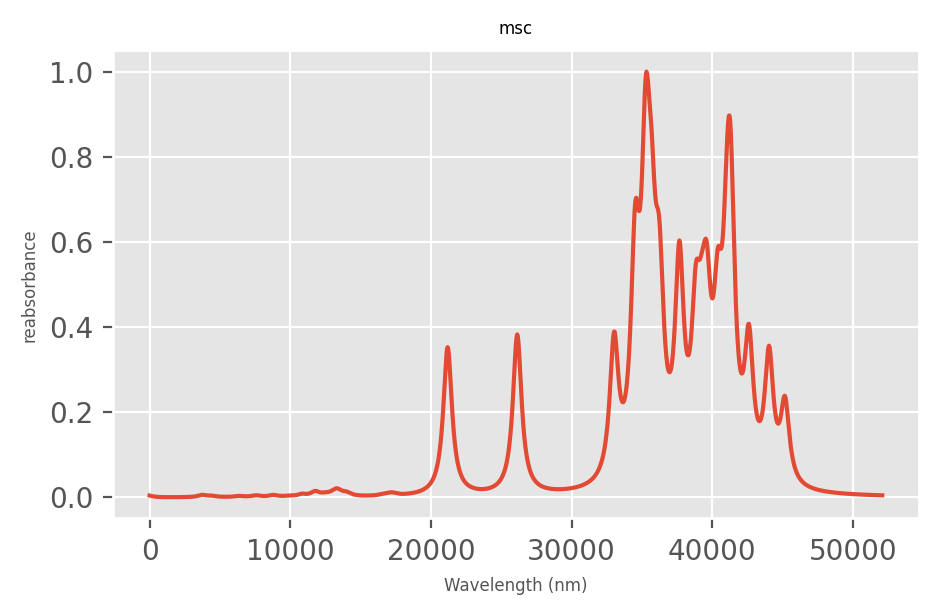

In [108]:
p.PlotSpectrum(uv[:1].cpu(), 'msc', 0, 5).show()

In [55]:
G.eval()
with torch.no_grad():
    lossprint=0
    printj=0
    for test_x,test_y in train_loader:
        print(test_y.max())

        test_x=test_x.to(torch.float32).cuda(1)
        test_y=test_y.to(torch.float32).cuda(1)
        tsangle=test_y[:,:152]
        tsdangle=test_y[:,152:303]
        tsbond=test_y[:,303:]
        txconf=G(test_x,init_conformation,init_spectrum)

        txangle=txconf[:,:152]
        txdangle=txconf[:,152:303]
        txbond=txconf[:,303:]
        lossa=l2_loss_fn(tsangle,txangle).mean()
        lossda=l2_loss_fn(tsdangle,txdangle).mean()
        lossd=l2_loss_fn(tsbond,txbond).mean()
        lossprint=lossda.item()+lossprint
        printj=printj+1
        print(lossa.item(),lossd.item(), lossda.item())
    print(lossprint/printj)


tensor(1.7996)
0.025740250945091248 0.022453587502241135 0.1868467479944229
tensor(1.7997)
0.024860825389623642 0.023032328113913536 0.20573103427886963
tensor(1.7999)
0.026275111362338066 0.022975634783506393 0.18481950461864471
tensor(1.7999)
0.025156395509839058 0.023249899968504906 0.21809856593608856
tensor(1.7997)
0.025885045528411865 0.023571064695715904 0.20158691704273224
tensor(1.7998)
0.025857452303171158 0.02220616675913334 0.21558696031570435
tensor(1.7999)
0.02593654952943325 0.0234092865139246 0.19668985903263092
tensor(1.7994)
0.025858022272586823 0.02288982830941677 0.2400892674922943
tensor(1.7998)
0.025688083842396736 0.02311130426824093 0.22585150599479675
tensor(1.7992)
0.02637558802962303 0.023515421897172928 0.19707895815372467
tensor(1.7999)
0.02620919793844223 0.023420143872499466 0.19372878968715668
tensor(1.7999)
0.024931881576776505 0.0227517057210207 0.2043447047472
tensor(1.7999)
0.026388026773929596 0.02254166267812252 0.21076078712940216
tensor(1.8000)
0

0.02577720768749714 0.022314773872494698 0.22735540568828583
tensor(1.7999)
0.02570536360144615 0.023002220317721367 0.2072025090456009
tensor(1.8000)
0.02591840550303459 0.023141847923398018 0.23916898667812347
tensor(1.7999)
0.025589371100068092 0.022925157099962234 0.21623654663562775
tensor(1.8000)
0.026130011305212975 0.02372507005929947 0.22608810663223267
tensor(1.7999)
0.0266986396163702 0.023753801360726357 0.22321653366088867
tensor(1.7998)
0.02593029849231243 0.0237948689609766 0.2197350561618805
tensor(1.8000)
0.025854501873254776 0.023363616317510605 0.2337610125541687
tensor(1.7998)
0.025850826874375343 0.023112311959266663 0.2294691950082779
tensor(1.8000)
0.025978391990065575 0.02225070260465145 0.2303169220685959
tensor(1.7993)
0.026074664667248726 0.022700758650898933 0.24142031371593475
tensor(1.7998)
0.026897205039858818 0.022920720279216766 0.22698287665843964
tensor(1.7998)
0.02548001892864704 0.023442447185516357 0.21510779857635498
tensor(1.7999)
0.0268098339438

0.02625003084540367 0.022678673267364502 0.22790022194385529
tensor(1.7999)
0.025949751958251 0.022869667038321495 0.22164563834667206
tensor(1.7996)
0.026176806539297104 0.02349333092570305 0.21846960484981537
tensor(1.8000)
0.025253115221858025 0.022881818935275078 0.22550120949745178
tensor(1.7999)
0.026698198169469833 0.023052135482430458 0.21505765616893768
tensor(1.7997)
0.026876505464315414 0.023976847529411316 0.22417205572128296
tensor(1.8000)
0.02626725658774376 0.02303009107708931 0.2469044327735901
tensor(1.7999)
0.026528364047408104 0.022641682997345924 0.22547079622745514
tensor(1.7997)
0.025784652680158615 0.02369776740670204 0.22166571021080017
tensor(1.7998)
0.025708621367812157 0.023320071399211884 0.21819108724594116
tensor(1.7999)
0.026679133996367455 0.023302895948290825 0.2221272736787796
tensor(1.7998)
0.0254608653485775 0.022345710545778275 0.22535477578639984
tensor(1.7993)
0.026006411761045456 0.02298777922987938 0.24274542927742004
tensor(1.7996)
0.0260077379

0.025495845824480057 0.02277255617082119 0.22996655106544495
tensor(1.7999)
0.025703107938170433 0.023841427639126778 0.21952511370182037
tensor(1.8000)
0.026256674900650978 0.022876443341374397 0.22092513740062714
tensor(1.7999)
0.024426959455013275 0.02243277058005333 0.22684235870838165
tensor(1.7999)
0.025691114366054535 0.023869985714554787 0.20820075273513794
tensor(1.7998)
0.026272539049386978 0.023351121693849564 0.2221945971250534
tensor(1.7997)
0.025813980028033257 0.022577492520213127 0.2157295197248459
tensor(1.7999)
0.0258464477956295 0.023363986983895302 0.22011511027812958
tensor(1.7996)
0.025481650605797768 0.023285536095499992 0.20944464206695557
tensor(1.7999)
0.026226775720715523 0.0238663237541914 0.22512423992156982
tensor(1.7997)
0.026655178517103195 0.022648274898529053 0.22234784066677094
tensor(1.7999)
0.025794753804802895 0.023314470425248146 0.23388616740703583
tensor(1.7987)
0.025586215779185295 0.022932259365916252 0.207686185836792
tensor(1.7999)
0.0258748

tensor(1.7999)
0.026420611888170242 0.02417263761162758 0.21310093998908997
tensor(1.7999)
0.02574021741747856 0.02302739769220352 0.20831617712974548
tensor(1.7999)
0.024973170831799507 0.023204628378152847 0.22308869659900665
tensor(1.8000)
0.026762567460536957 0.023696042597293854 0.22058457136154175
tensor(1.7998)
0.025947419926524162 0.023339400067925453 0.2064639776945114
tensor(1.7999)
0.026578282937407494 0.02333722822368145 0.23633961379528046
tensor(1.8000)
0.02577626332640648 0.02318805642426014 0.2211817502975464
tensor(1.8000)
0.02575881965458393 0.022877471521496773 0.19615064561367035
tensor(1.7995)
0.024775391444563866 0.023362528532743454 0.19630129635334015
tensor(1.8000)
0.025972595438361168 0.02269895188510418 0.20858652889728546
tensor(1.7999)
0.02539217285811901 0.022238224744796753 0.2151949107646942
tensor(1.7997)
0.026014328002929688 0.023113587871193886 0.2202252447605133
tensor(1.7998)
0.02710590325295925 0.02275916002690792 0.23645226657390594
tensor(1.8000)

In [87]:
langle=Ligand_y[:,:302]
ldangle=Ligand_y[:,302:603]
lbond=Ligand_y[:,603:]
xlconf=G(Ligand_x,init_conformation,init_spectrum)
        
xlangle=xlconf[:,:302]
xldangle=xlconf[:,302:603]
xlbond=xlconf[:,603:]
lossa=l2_loss_fn(xlangle,langle).mean()
lossda=l2_loss_fn(xldangle,ldangle).mean()
lossd=l2_loss_fn(xlbond,lbond).mean()
print(lossa.item(),lossd.item(), lossda.item())

3.987994432449341 0.06577188521623611 77.4921875


In [86]:
G=torch.load('nei_model3.pkl').cuda()

In [89]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.10.2
True
